# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [85]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join( 'data', 'train.p')
validation_file= os.path.join( 'data', 'valid.p')
testing_file = os.path.join( 'data', 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [86]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


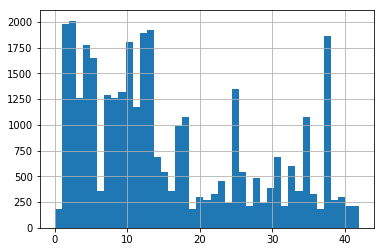

In [87]:
Y_train_array = pd.DataFrame(y_train, columns=['class'], dtype=np.int8)
hist = Y_train_array['class'].hist(bins = 43)

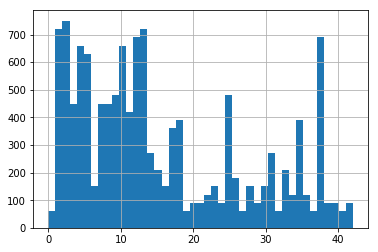

In [88]:
Y_test_array = pd.DataFrame(y_test, columns=['class'], dtype=np.int8)
hist = Y_test_array['class'].hist(bins = 43)

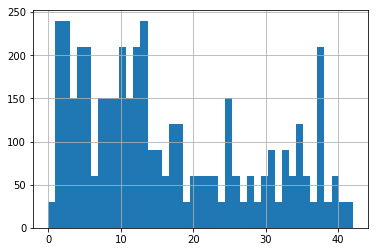

In [89]:
Y_validation_array = pd.DataFrame(y_valid, columns=['class'], dtype=np.int8)
hist = Y_validation_array['class'].hist(bins = 43)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [90]:
type(y_train)

numpy.ndarray

In [91]:
import pandas as pd
train_array = pd.DataFrame(y_train, columns=['class'], dtype=np.int8)# dtype=np.str)
#train_array['class'].value_counts()

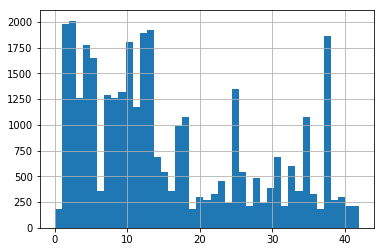

In [92]:
hist = train_array['class'].hist(bins = 43)

In [93]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

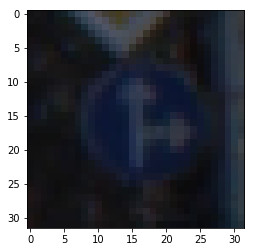

In [94]:
plt.imshow(X_train[1000])

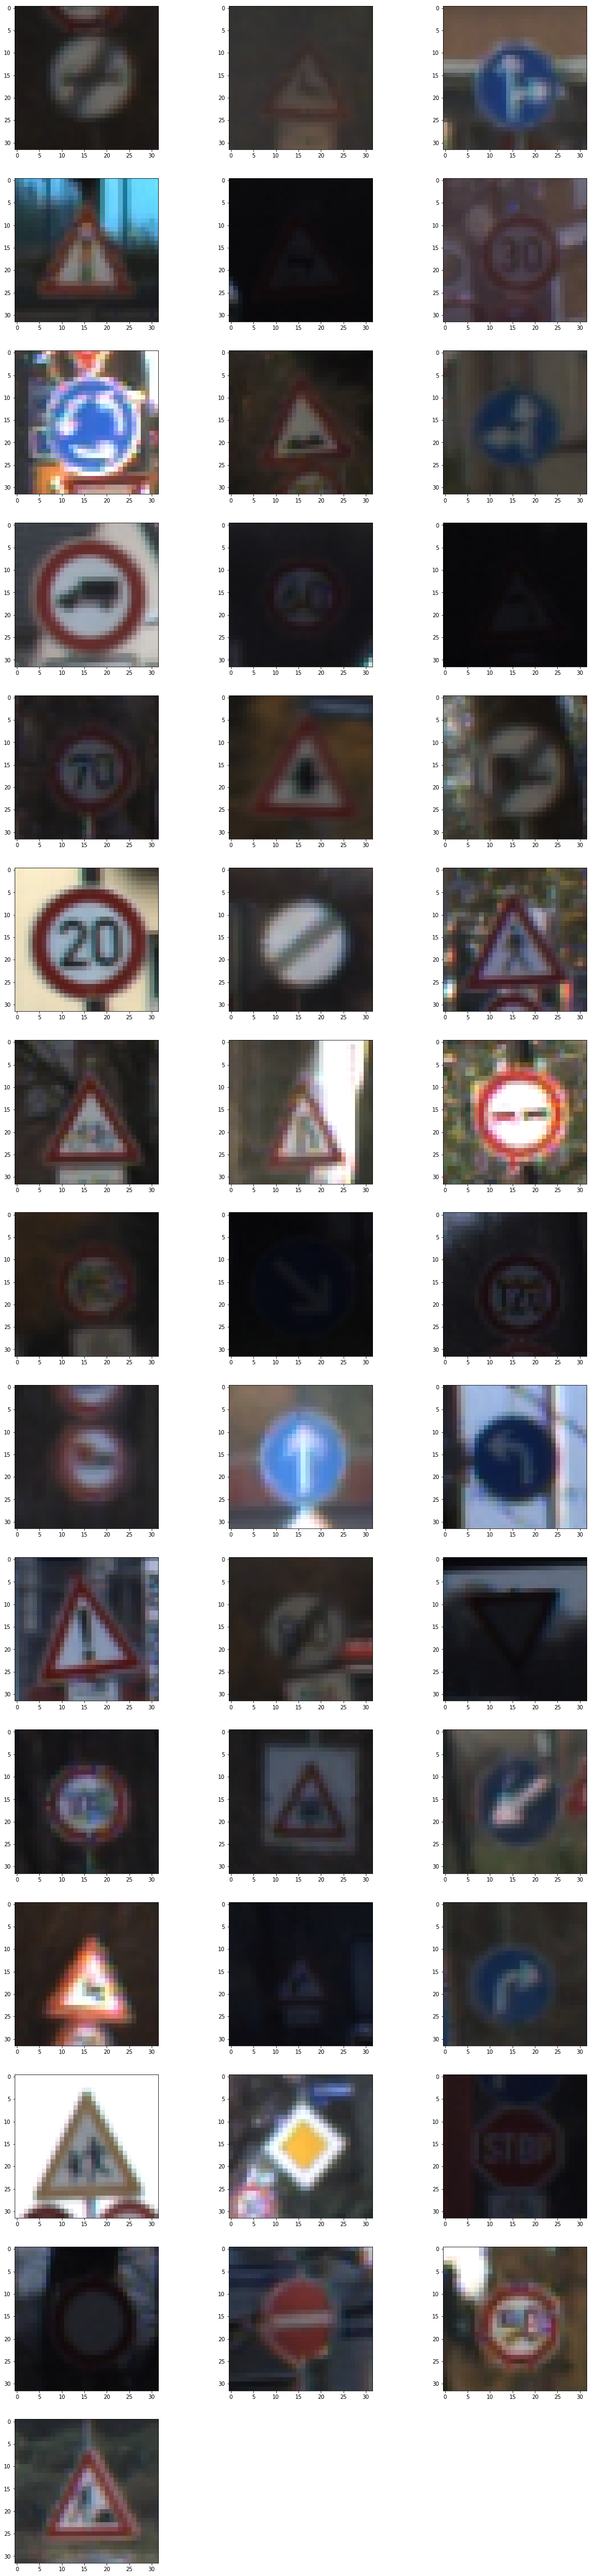

In [95]:
# print one of each distinct sample
uniques = len(train_array['class'].unique())
counter = 0

plt.figure(figsize=(20,250))

for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    image = X_train[indexes[1]]
    plt.subplot(uniques, 3, counter+1)
    plt.imshow(image)
    counter += 1

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Upsample under-represented classes

In [96]:
def apply_to_array(array, img_func):
    
    ans_array = []

    for itm in array:
        proc = img_func(itm)
        #proc = np.expand_dims(proc, axis=2)
        ans_array.append(proc)

    numpy_arr = np.array(ans_array)
    
    return numpy_arr

In [98]:
# build a jitter function
import skimage as sk

def jitter_func(array: np.ndarray):
    assert len(array.shape) == 3
    assert array.shape[2] == 3
    
    result = sk.util.random_noise(array, mode='gaussian') 
    #result = result*255
    
    # explore this one sometimes the noise image is very different?
    mean_ratio = np.mean(array) / np.mean(result) 
    #assert (mean_ratio >= 0.8)
    
    return result 

In [99]:
import random

def random_rotation(image_array: np.ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)


In [100]:
resample_threshold = 500

res_train_X = X_train
res_train_Y = y_train

for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    if len(indexes) < resample_threshold:
        diff = resample_threshold - len(indexes)
        sample = np.random.choice(indexes, diff, replace=True)
        print('class: {0}, class_size: {1}, resamples: {2}'.format(it, len(indexes), len(sample)))
        extras_X = np.take(X_train, sample, axis = 0)
        extras_Y = np.take(y_train, sample)
        
        extras_X_jit = apply_to_array(extras_X, jitter_func)
        extras_X_jit = apply_to_array(extras_X_jit, random_rotation)
        
    
        #print('mean before: {0}, mean after: {1}'.format(np.mean(extras_X), np.mean(extras_X_jit) ))
    
        res_train_X = np.append(res_train_X, extras_X_jit, axis = 0 )
        res_train_Y = np.append(res_train_Y, extras_Y )
        

class: 41, class_size: 210, resamples: 290
class: 36, class_size: 330, resamples: 170
class: 23, class_size: 450, resamples: 50
class: 40, class_size: 300, resamples: 200
class: 22, class_size: 330, resamples: 170
class: 37, class_size: 180, resamples: 320
class: 16, class_size: 360, resamples: 140
class: 19, class_size: 180, resamples: 320
class: 42, class_size: 210, resamples: 290
class: 0, class_size: 180, resamples: 320
class: 32, class_size: 210, resamples: 290
class: 27, class_size: 210, resamples: 290
class: 29, class_size: 240, resamples: 260
class: 24, class_size: 240, resamples: 260
class: 34, class_size: 360, resamples: 140
class: 6, class_size: 360, resamples: 140
class: 30, class_size: 390, resamples: 110
class: 39, class_size: 270, resamples: 230
class: 21, class_size: 270, resamples: 230
class: 20, class_size: 300, resamples: 200
class: 28, class_size: 480, resamples: 20


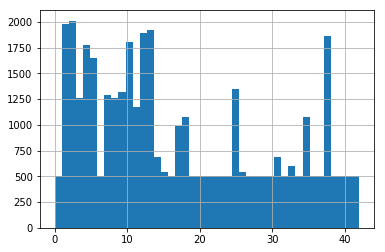

In [101]:
resamp_train_array = pd.DataFrame(res_train_Y, columns=['class'], dtype=np.int8)
hist = resamp_train_array['class'].hist(bins = 43)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [102]:
import tensorflow as tf

In [103]:
# Dataset for preproc
X_toUse = res_train_X

In [109]:
# Normalise
#X_train_proc = (X_toUse - 128)/128
#X_valid_proc = (X_valid - 128)/128

X_train_proc = X_toUse/256
X_valid_proc = X_valid/256


In [118]:
import cv2

def greyscaler(array):
    assert len(array.shape) == 3
    assert array.shape[2] == 3
    img = np.array(array, dtype=np.uint8) # fix for numpy data type
    result = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    
    return result 

255.0

In [119]:
greyscale_X = apply_to_array(X_train_proc, greyscaler)
greyscale_valid = apply_to_array(X_valid_proc, greyscaler)

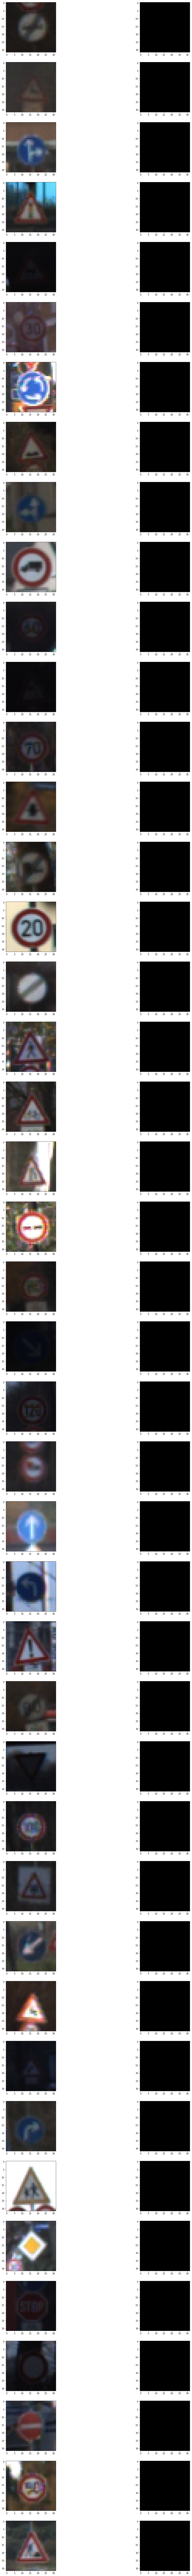

In [120]:
#index = 400
#plt.subplot(2, 2, 1)
#plt.imshow(X_train[index])
#plt.subplot(2, 2, 2)
#plt.imshow(numpy_arr[index], cmap = 'gray')
plt.figure(figsize=(20,len(train_array['class'].unique())*10))
counter = 0
for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    image = X_train[indexes[1]]
    plt.subplot(uniques*2, 2, counter+1)
    plt.imshow(image)
    plt.subplot(uniques*2, 2, counter+2)
    plt.imshow(greyscale_X[indexes[1]], cmap='gray')
    counter += 2

In [121]:
# whitening process - https://github.com/hadrienj/Preprocessing-for-deep-learning/blob/master/Preprocessing-for-deep-learning.ipynb
# center function
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

In [ ]:
# not working well - need debug
"""
ans_array = []

for itm in numpy_arr:
    proc = whiten(itm)
    #proc = np.expand_dims(proc, axis=2)
    ans_array.append(proc)

numpy_whit_arr = np.array(ans_array)
"""


### Model Architecture

In [74]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [132]:
# Use LeNet

from tensorflow.contrib.layers import flatten

    
def LeNet(x):    
    #x = tf.image.rgb_to_grayscale(x)
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # drop out
    drop_1 = tf.nn.dropout(fc1, kp_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(drop_1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # drop out
    drop_2 = tf.nn.dropout(fc2, kp_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [133]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [134]:
EPOCHS = 10000
BATCH_SIZE = 256
X_train_dataset = X_train_proc # X_train_proc
Y_train_dataset = res_train_Y

X_valid_dataset = X_valid_proc
Y_valid_dataset = y_valid

In [135]:
# placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
kp_prob = tf.placeholder(tf.float32)

In [136]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [137]:
# model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, kp_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [138]:
# replace with keras?
# have issues with the training loop cause of the batching shuffle in the epoch loop I think?
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(EPOCHS):
        #image_batch, label_batch = tf.train.shuffle_batch([X_train_proc, y_train], enqueue_many=True, 
        #                               batch_size=BATCH_SIZE, capacity=10000, min_after_dequeue=10, 
        #                               allow_smaller_final_batch=True)
        permutation=np.random.permutation(len(X_train_dataset))
        permutation=permutation[0:BATCH_SIZE]
        batch=[X_train_dataset[permutation],Y_train_dataset[permutation]]
        
        sess.run(training_operation, feed_dict={x: batch[0], y: batch[1], kp_prob: 0.35})
        train_accuracy = evaluate(X_train_dataset, Y_train_dataset)
        validation_accuracy = evaluate(X_valid_dataset, Y_valid_dataset)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f} Train Accuracy = {:.3f}".format(validation_accuracy, train_accuracy))
        print()
        
        if i % 10 == 0:
            save_path = saver.save(sess, "model/model_" + str(i) + ".ckpt")
            print("Model saved in path: %s" % save_path)
    

EPOCH 1 ...
Validation Accuracy = 0.051 Train Accuracy = 0.036

Model saved in path: model/model_0.ckpt
EPOCH 2 ...
Validation Accuracy = 0.056 Train Accuracy = 0.040

EPOCH 3 ...
Validation Accuracy = 0.054 Train Accuracy = 0.039

EPOCH 4 ...
Validation Accuracy = 0.040 Train Accuracy = 0.037

EPOCH 5 ...
Validation Accuracy = 0.038 Train Accuracy = 0.037

EPOCH 6 ...
Validation Accuracy = 0.038 Train Accuracy = 0.038

EPOCH 7 ...
Validation Accuracy = 0.039 Train Accuracy = 0.039

EPOCH 8 ...
Validation Accuracy = 0.040 Train Accuracy = 0.041

EPOCH 9 ...
Validation Accuracy = 0.041 Train Accuracy = 0.042

EPOCH 10 ...
Validation Accuracy = 0.043 Train Accuracy = 0.045

EPOCH 11 ...
Validation Accuracy = 0.044 Train Accuracy = 0.049

Model saved in path: model/model_10.ckpt
EPOCH 12 ...
Validation Accuracy = 0.048 Train Accuracy = 0.054

EPOCH 13 ...
Validation Accuracy = 0.052 Train Accuracy = 0.059

EPOCH 14 ...
Validation Accuracy = 0.056 Train Accuracy = 0.066

EPOCH 15 ...
Valid

EPOCH 120 ...
Validation Accuracy = 0.241 Train Accuracy = 0.234

EPOCH 121 ...
Validation Accuracy = 0.239 Train Accuracy = 0.232

Model saved in path: model/model_120.ckpt
EPOCH 122 ...
Validation Accuracy = 0.236 Train Accuracy = 0.229

EPOCH 123 ...
Validation Accuracy = 0.234 Train Accuracy = 0.227

EPOCH 124 ...
Validation Accuracy = 0.232 Train Accuracy = 0.225

EPOCH 125 ...
Validation Accuracy = 0.230 Train Accuracy = 0.223

EPOCH 126 ...
Validation Accuracy = 0.228 Train Accuracy = 0.225

EPOCH 127 ...
Validation Accuracy = 0.223 Train Accuracy = 0.226

EPOCH 128 ...
Validation Accuracy = 0.217 Train Accuracy = 0.226

EPOCH 129 ...
Validation Accuracy = 0.229 Train Accuracy = 0.232

EPOCH 130 ...
Validation Accuracy = 0.239 Train Accuracy = 0.240

EPOCH 131 ...
Validation Accuracy = 0.244 Train Accuracy = 0.243

Model saved in path: model/model_130.ckpt
EPOCH 132 ...
Validation Accuracy = 0.247 Train Accuracy = 0.245

EPOCH 133 ...
Validation Accuracy = 0.246 Train Accuracy =

EPOCH 237 ...
Validation Accuracy = 0.382 Train Accuracy = 0.381

EPOCH 238 ...
Validation Accuracy = 0.381 Train Accuracy = 0.381

EPOCH 239 ...
Validation Accuracy = 0.382 Train Accuracy = 0.381

EPOCH 240 ...
Validation Accuracy = 0.381 Train Accuracy = 0.381

EPOCH 241 ...
Validation Accuracy = 0.382 Train Accuracy = 0.380

Model saved in path: model/model_240.ckpt
EPOCH 242 ...
Validation Accuracy = 0.381 Train Accuracy = 0.380

EPOCH 243 ...
Validation Accuracy = 0.381 Train Accuracy = 0.380

EPOCH 244 ...
Validation Accuracy = 0.381 Train Accuracy = 0.382

EPOCH 245 ...
Validation Accuracy = 0.383 Train Accuracy = 0.383

EPOCH 246 ...
Validation Accuracy = 0.386 Train Accuracy = 0.387

EPOCH 247 ...
Validation Accuracy = 0.390 Train Accuracy = 0.391

EPOCH 248 ...
Validation Accuracy = 0.390 Train Accuracy = 0.394

EPOCH 249 ...
Validation Accuracy = 0.390 Train Accuracy = 0.394

EPOCH 250 ...
Validation Accuracy = 0.390 Train Accuracy = 0.393

EPOCH 251 ...
Validation Accuracy 

EPOCH 354 ...
Validation Accuracy = 0.452 Train Accuracy = 0.446

EPOCH 355 ...
Validation Accuracy = 0.449 Train Accuracy = 0.444

EPOCH 356 ...
Validation Accuracy = 0.446 Train Accuracy = 0.445

EPOCH 357 ...
Validation Accuracy = 0.447 Train Accuracy = 0.444

EPOCH 358 ...
Validation Accuracy = 0.448 Train Accuracy = 0.442

EPOCH 359 ...
Validation Accuracy = 0.450 Train Accuracy = 0.440

EPOCH 360 ...
Validation Accuracy = 0.453 Train Accuracy = 0.441

EPOCH 361 ...
Validation Accuracy = 0.455 Train Accuracy = 0.443

Model saved in path: model/model_360.ckpt
EPOCH 362 ...
Validation Accuracy = 0.459 Train Accuracy = 0.445

EPOCH 363 ...
Validation Accuracy = 0.459 Train Accuracy = 0.447

EPOCH 364 ...
Validation Accuracy = 0.457 Train Accuracy = 0.448

EPOCH 365 ...
Validation Accuracy = 0.454 Train Accuracy = 0.448

EPOCH 366 ...
Validation Accuracy = 0.453 Train Accuracy = 0.450

EPOCH 367 ...
Validation Accuracy = 0.458 Train Accuracy = 0.454

EPOCH 368 ...
Validation Accuracy 

Model saved in path: model/model_470.ckpt
EPOCH 472 ...
Validation Accuracy = 0.520 Train Accuracy = 0.508

EPOCH 473 ...
Validation Accuracy = 0.525 Train Accuracy = 0.514

EPOCH 474 ...
Validation Accuracy = 0.528 Train Accuracy = 0.520

EPOCH 475 ...
Validation Accuracy = 0.541 Train Accuracy = 0.532

EPOCH 476 ...
Validation Accuracy = 0.551 Train Accuracy = 0.543

EPOCH 477 ...
Validation Accuracy = 0.559 Train Accuracy = 0.546

EPOCH 478 ...
Validation Accuracy = 0.564 Train Accuracy = 0.550

EPOCH 479 ...
Validation Accuracy = 0.566 Train Accuracy = 0.551

EPOCH 480 ...
Validation Accuracy = 0.564 Train Accuracy = 0.552

EPOCH 481 ...
Validation Accuracy = 0.561 Train Accuracy = 0.553

Model saved in path: model/model_480.ckpt
EPOCH 482 ...
Validation Accuracy = 0.557 Train Accuracy = 0.551

EPOCH 483 ...
Validation Accuracy = 0.559 Train Accuracy = 0.548

EPOCH 484 ...
Validation Accuracy = 0.562 Train Accuracy = 0.547

EPOCH 485 ...
Validation Accuracy = 0.567 Train Accuracy =

EPOCH 589 ...
Validation Accuracy = 0.595 Train Accuracy = 0.586

EPOCH 590 ...
Validation Accuracy = 0.605 Train Accuracy = 0.595

EPOCH 591 ...
Validation Accuracy = 0.612 Train Accuracy = 0.600

Model saved in path: model/model_590.ckpt
EPOCH 592 ...
Validation Accuracy = 0.614 Train Accuracy = 0.603

EPOCH 593 ...
Validation Accuracy = 0.616 Train Accuracy = 0.606

EPOCH 594 ...
Validation Accuracy = 0.619 Train Accuracy = 0.605

EPOCH 595 ...
Validation Accuracy = 0.621 Train Accuracy = 0.603

EPOCH 596 ...
Validation Accuracy = 0.622 Train Accuracy = 0.603

EPOCH 597 ...
Validation Accuracy = 0.622 Train Accuracy = 0.604

EPOCH 598 ...
Validation Accuracy = 0.619 Train Accuracy = 0.602

EPOCH 599 ...
Validation Accuracy = 0.620 Train Accuracy = 0.605

EPOCH 600 ...
Validation Accuracy = 0.621 Train Accuracy = 0.608

EPOCH 601 ...
Validation Accuracy = 0.622 Train Accuracy = 0.609

Model saved in path: model/model_600.ckpt
EPOCH 602 ...
Validation Accuracy = 0.623 Train Accuracy =

EPOCH 706 ...
Validation Accuracy = 0.678 Train Accuracy = 0.658

EPOCH 707 ...
Validation Accuracy = 0.681 Train Accuracy = 0.662

EPOCH 708 ...
Validation Accuracy = 0.683 Train Accuracy = 0.662

EPOCH 709 ...
Validation Accuracy = 0.680 Train Accuracy = 0.662

EPOCH 710 ...
Validation Accuracy = 0.676 Train Accuracy = 0.660

EPOCH 711 ...
Validation Accuracy = 0.668 Train Accuracy = 0.655

Model saved in path: model/model_710.ckpt
EPOCH 712 ...
Validation Accuracy = 0.665 Train Accuracy = 0.651

EPOCH 713 ...
Validation Accuracy = 0.666 Train Accuracy = 0.655

EPOCH 714 ...
Validation Accuracy = 0.673 Train Accuracy = 0.659

EPOCH 715 ...
Validation Accuracy = 0.680 Train Accuracy = 0.663

EPOCH 716 ...
Validation Accuracy = 0.688 Train Accuracy = 0.666

EPOCH 717 ...
Validation Accuracy = 0.689 Train Accuracy = 0.666

EPOCH 718 ...
Validation Accuracy = 0.686 Train Accuracy = 0.664

EPOCH 719 ...
Validation Accuracy = 0.681 Train Accuracy = 0.660

EPOCH 720 ...
Validation Accuracy 

EPOCH 823 ...
Validation Accuracy = 0.724 Train Accuracy = 0.700

EPOCH 824 ...
Validation Accuracy = 0.724 Train Accuracy = 0.699

EPOCH 825 ...
Validation Accuracy = 0.721 Train Accuracy = 0.696

EPOCH 826 ...
Validation Accuracy = 0.716 Train Accuracy = 0.693

EPOCH 827 ...
Validation Accuracy = 0.712 Train Accuracy = 0.692

EPOCH 828 ...
Validation Accuracy = 0.713 Train Accuracy = 0.694

EPOCH 829 ...
Validation Accuracy = 0.711 Train Accuracy = 0.692

EPOCH 830 ...
Validation Accuracy = 0.713 Train Accuracy = 0.694

EPOCH 831 ...
Validation Accuracy = 0.713 Train Accuracy = 0.694

Model saved in path: model/model_830.ckpt
EPOCH 832 ...
Validation Accuracy = 0.713 Train Accuracy = 0.694

EPOCH 833 ...
Validation Accuracy = 0.710 Train Accuracy = 0.693

EPOCH 834 ...
Validation Accuracy = 0.703 Train Accuracy = 0.688

EPOCH 835 ...
Validation Accuracy = 0.699 Train Accuracy = 0.684

EPOCH 836 ...
Validation Accuracy = 0.699 Train Accuracy = 0.685

EPOCH 837 ...
Validation Accuracy 

EPOCH 941 ...
Validation Accuracy = 0.728 Train Accuracy = 0.716

Model saved in path: model/model_940.ckpt
EPOCH 942 ...
Validation Accuracy = 0.722 Train Accuracy = 0.709

EPOCH 943 ...
Validation Accuracy = 0.720 Train Accuracy = 0.709

EPOCH 944 ...
Validation Accuracy = 0.727 Train Accuracy = 0.713

EPOCH 945 ...
Validation Accuracy = 0.739 Train Accuracy = 0.720

EPOCH 946 ...
Validation Accuracy = 0.748 Train Accuracy = 0.728

EPOCH 947 ...
Validation Accuracy = 0.755 Train Accuracy = 0.733

EPOCH 948 ...
Validation Accuracy = 0.755 Train Accuracy = 0.734

EPOCH 949 ...
Validation Accuracy = 0.751 Train Accuracy = 0.733

EPOCH 950 ...
Validation Accuracy = 0.748 Train Accuracy = 0.734

EPOCH 951 ...
Validation Accuracy = 0.743 Train Accuracy = 0.730

Model saved in path: model/model_950.ckpt
EPOCH 952 ...
Validation Accuracy = 0.741 Train Accuracy = 0.726

EPOCH 953 ...
Validation Accuracy = 0.736 Train Accuracy = 0.721

EPOCH 954 ...
Validation Accuracy = 0.737 Train Accuracy =

EPOCH 1057 ...
Validation Accuracy = 0.781 Train Accuracy = 0.749

EPOCH 1058 ...
Validation Accuracy = 0.780 Train Accuracy = 0.748

EPOCH 1059 ...
Validation Accuracy = 0.781 Train Accuracy = 0.747

EPOCH 1060 ...
Validation Accuracy = 0.776 Train Accuracy = 0.749

EPOCH 1061 ...
Validation Accuracy = 0.775 Train Accuracy = 0.752

Model saved in path: model/model_1060.ckpt
EPOCH 1062 ...
Validation Accuracy = 0.773 Train Accuracy = 0.749

EPOCH 1063 ...
Validation Accuracy = 0.768 Train Accuracy = 0.746

EPOCH 1064 ...
Validation Accuracy = 0.768 Train Accuracy = 0.746

EPOCH 1065 ...
Validation Accuracy = 0.770 Train Accuracy = 0.741

EPOCH 1066 ...
Validation Accuracy = 0.777 Train Accuracy = 0.745

EPOCH 1067 ...
Validation Accuracy = 0.787 Train Accuracy = 0.752

EPOCH 1068 ...
Validation Accuracy = 0.789 Train Accuracy = 0.754

EPOCH 1069 ...
Validation Accuracy = 0.789 Train Accuracy = 0.756

EPOCH 1070 ...
Validation Accuracy = 0.788 Train Accuracy = 0.757

EPOCH 1071 ...
Vali

EPOCH 1172 ...
Validation Accuracy = 0.787 Train Accuracy = 0.760

EPOCH 1173 ...
Validation Accuracy = 0.797 Train Accuracy = 0.765

EPOCH 1174 ...
Validation Accuracy = 0.803 Train Accuracy = 0.768

EPOCH 1175 ...
Validation Accuracy = 0.806 Train Accuracy = 0.769

EPOCH 1176 ...
Validation Accuracy = 0.806 Train Accuracy = 0.770

EPOCH 1177 ...
Validation Accuracy = 0.806 Train Accuracy = 0.770

EPOCH 1178 ...
Validation Accuracy = 0.806 Train Accuracy = 0.770

EPOCH 1179 ...
Validation Accuracy = 0.805 Train Accuracy = 0.770

EPOCH 1180 ...
Validation Accuracy = 0.802 Train Accuracy = 0.771

EPOCH 1181 ...
Validation Accuracy = 0.798 Train Accuracy = 0.771

Model saved in path: model/model_1180.ckpt
EPOCH 1182 ...
Validation Accuracy = 0.796 Train Accuracy = 0.771

EPOCH 1183 ...
Validation Accuracy = 0.795 Train Accuracy = 0.771

EPOCH 1184 ...
Validation Accuracy = 0.794 Train Accuracy = 0.771

EPOCH 1185 ...
Validation Accuracy = 0.795 Train Accuracy = 0.771

EPOCH 1186 ...
Vali

EPOCH 1288 ...
Validation Accuracy = 0.832 Train Accuracy = 0.779

EPOCH 1289 ...
Validation Accuracy = 0.828 Train Accuracy = 0.778

EPOCH 1290 ...
Validation Accuracy = 0.823 Train Accuracy = 0.777

EPOCH 1291 ...
Validation Accuracy = 0.820 Train Accuracy = 0.777

Model saved in path: model/model_1290.ckpt
EPOCH 1292 ...
Validation Accuracy = 0.819 Train Accuracy = 0.778

EPOCH 1293 ...
Validation Accuracy = 0.817 Train Accuracy = 0.778

EPOCH 1294 ...
Validation Accuracy = 0.817 Train Accuracy = 0.778

EPOCH 1295 ...
Validation Accuracy = 0.816 Train Accuracy = 0.780

EPOCH 1296 ...
Validation Accuracy = 0.814 Train Accuracy = 0.779

EPOCH 1297 ...
Validation Accuracy = 0.814 Train Accuracy = 0.780

EPOCH 1298 ...
Validation Accuracy = 0.815 Train Accuracy = 0.781

EPOCH 1299 ...
Validation Accuracy = 0.816 Train Accuracy = 0.784

EPOCH 1300 ...
Validation Accuracy = 0.820 Train Accuracy = 0.782

EPOCH 1301 ...
Validation Accuracy = 0.820 Train Accuracy = 0.783

Model saved in path

EPOCH 1403 ...
Validation Accuracy = 0.839 Train Accuracy = 0.787

EPOCH 1404 ...
Validation Accuracy = 0.837 Train Accuracy = 0.786

EPOCH 1405 ...
Validation Accuracy = 0.836 Train Accuracy = 0.787

EPOCH 1406 ...
Validation Accuracy = 0.837 Train Accuracy = 0.789

EPOCH 1407 ...
Validation Accuracy = 0.839 Train Accuracy = 0.791

EPOCH 1408 ...
Validation Accuracy = 0.840 Train Accuracy = 0.792

EPOCH 1409 ...
Validation Accuracy = 0.840 Train Accuracy = 0.792

EPOCH 1410 ...
Validation Accuracy = 0.838 Train Accuracy = 0.792

EPOCH 1411 ...
Validation Accuracy = 0.836 Train Accuracy = 0.792

Model saved in path: model/model_1410.ckpt
EPOCH 1412 ...
Validation Accuracy = 0.835 Train Accuracy = 0.794

EPOCH 1413 ...
Validation Accuracy = 0.833 Train Accuracy = 0.797

EPOCH 1414 ...
Validation Accuracy = 0.831 Train Accuracy = 0.797

EPOCH 1415 ...
Validation Accuracy = 0.828 Train Accuracy = 0.791

EPOCH 1416 ...
Validation Accuracy = 0.827 Train Accuracy = 0.786

EPOCH 1417 ...
Vali

EPOCH 1519 ...
Validation Accuracy = 0.847 Train Accuracy = 0.808

EPOCH 1520 ...
Validation Accuracy = 0.846 Train Accuracy = 0.810

EPOCH 1521 ...
Validation Accuracy = 0.846 Train Accuracy = 0.809

Model saved in path: model/model_1520.ckpt
EPOCH 1522 ...
Validation Accuracy = 0.845 Train Accuracy = 0.808

EPOCH 1523 ...
Validation Accuracy = 0.844 Train Accuracy = 0.806

EPOCH 1524 ...
Validation Accuracy = 0.845 Train Accuracy = 0.804

EPOCH 1525 ...
Validation Accuracy = 0.845 Train Accuracy = 0.801

EPOCH 1526 ...
Validation Accuracy = 0.845 Train Accuracy = 0.800

EPOCH 1527 ...
Validation Accuracy = 0.849 Train Accuracy = 0.800

EPOCH 1528 ...
Validation Accuracy = 0.849 Train Accuracy = 0.800

EPOCH 1529 ...
Validation Accuracy = 0.850 Train Accuracy = 0.799

EPOCH 1530 ...
Validation Accuracy = 0.849 Train Accuracy = 0.798

EPOCH 1531 ...
Validation Accuracy = 0.850 Train Accuracy = 0.798

Model saved in path: model/model_1530.ckpt
EPOCH 1532 ...
Validation Accuracy = 0.849 

EPOCH 1634 ...
Validation Accuracy = 0.853 Train Accuracy = 0.809

EPOCH 1635 ...
Validation Accuracy = 0.851 Train Accuracy = 0.807

EPOCH 1636 ...
Validation Accuracy = 0.851 Train Accuracy = 0.805

EPOCH 1637 ...
Validation Accuracy = 0.850 Train Accuracy = 0.804

EPOCH 1638 ...
Validation Accuracy = 0.850 Train Accuracy = 0.802

EPOCH 1639 ...
Validation Accuracy = 0.849 Train Accuracy = 0.802

EPOCH 1640 ...
Validation Accuracy = 0.850 Train Accuracy = 0.801

EPOCH 1641 ...
Validation Accuracy = 0.851 Train Accuracy = 0.802

Model saved in path: model/model_1640.ckpt
EPOCH 1642 ...
Validation Accuracy = 0.853 Train Accuracy = 0.802

EPOCH 1643 ...
Validation Accuracy = 0.853 Train Accuracy = 0.803

EPOCH 1644 ...
Validation Accuracy = 0.854 Train Accuracy = 0.803

EPOCH 1645 ...
Validation Accuracy = 0.858 Train Accuracy = 0.804

EPOCH 1646 ...
Validation Accuracy = 0.861 Train Accuracy = 0.806

EPOCH 1647 ...
Validation Accuracy = 0.859 Train Accuracy = 0.807

EPOCH 1648 ...
Vali

EPOCH 1750 ...
Validation Accuracy = 0.848 Train Accuracy = 0.823

EPOCH 1751 ...
Validation Accuracy = 0.849 Train Accuracy = 0.822

Model saved in path: model/model_1750.ckpt
EPOCH 1752 ...
Validation Accuracy = 0.852 Train Accuracy = 0.823

EPOCH 1753 ...
Validation Accuracy = 0.853 Train Accuracy = 0.821

EPOCH 1754 ...
Validation Accuracy = 0.853 Train Accuracy = 0.820

EPOCH 1755 ...
Validation Accuracy = 0.854 Train Accuracy = 0.820

EPOCH 1756 ...
Validation Accuracy = 0.857 Train Accuracy = 0.818

EPOCH 1757 ...
Validation Accuracy = 0.858 Train Accuracy = 0.817

EPOCH 1758 ...
Validation Accuracy = 0.859 Train Accuracy = 0.818

EPOCH 1759 ...
Validation Accuracy = 0.861 Train Accuracy = 0.819

EPOCH 1760 ...
Validation Accuracy = 0.864 Train Accuracy = 0.822

EPOCH 1761 ...
Validation Accuracy = 0.864 Train Accuracy = 0.822

Model saved in path: model/model_1760.ckpt
EPOCH 1762 ...
Validation Accuracy = 0.863 Train Accuracy = 0.820

EPOCH 1763 ...
Validation Accuracy = 0.863 

EPOCH 1865 ...
Validation Accuracy = 0.864 Train Accuracy = 0.831

EPOCH 1866 ...
Validation Accuracy = 0.864 Train Accuracy = 0.827

EPOCH 1867 ...
Validation Accuracy = 0.864 Train Accuracy = 0.823

EPOCH 1868 ...
Validation Accuracy = 0.862 Train Accuracy = 0.820

EPOCH 1869 ...
Validation Accuracy = 0.860 Train Accuracy = 0.818

EPOCH 1870 ...
Validation Accuracy = 0.861 Train Accuracy = 0.817

EPOCH 1871 ...
Validation Accuracy = 0.858 Train Accuracy = 0.816

Model saved in path: model/model_1870.ckpt
EPOCH 1872 ...
Validation Accuracy = 0.858 Train Accuracy = 0.815

EPOCH 1873 ...
Validation Accuracy = 0.855 Train Accuracy = 0.816

EPOCH 1874 ...
Validation Accuracy = 0.859 Train Accuracy = 0.818

EPOCH 1875 ...
Validation Accuracy = 0.858 Train Accuracy = 0.821

EPOCH 1876 ...
Validation Accuracy = 0.857 Train Accuracy = 0.825

EPOCH 1877 ...
Validation Accuracy = 0.857 Train Accuracy = 0.827

EPOCH 1878 ...
Validation Accuracy = 0.858 Train Accuracy = 0.827

EPOCH 1879 ...
Vali

EPOCH 1981 ...
Validation Accuracy = 0.866 Train Accuracy = 0.835

Model saved in path: model/model_1980.ckpt
EPOCH 1982 ...
Validation Accuracy = 0.868 Train Accuracy = 0.832

EPOCH 1983 ...
Validation Accuracy = 0.871 Train Accuracy = 0.827

EPOCH 1984 ...
Validation Accuracy = 0.871 Train Accuracy = 0.826

EPOCH 1985 ...
Validation Accuracy = 0.871 Train Accuracy = 0.824

EPOCH 1986 ...
Validation Accuracy = 0.872 Train Accuracy = 0.825

EPOCH 1987 ...
Validation Accuracy = 0.871 Train Accuracy = 0.825

EPOCH 1988 ...
Validation Accuracy = 0.870 Train Accuracy = 0.827

EPOCH 1989 ...
Validation Accuracy = 0.867 Train Accuracy = 0.832

EPOCH 1990 ...
Validation Accuracy = 0.863 Train Accuracy = 0.832

EPOCH 1991 ...
Validation Accuracy = 0.864 Train Accuracy = 0.830

Model saved in path: model/model_1990.ckpt
EPOCH 1992 ...
Validation Accuracy = 0.867 Train Accuracy = 0.828

EPOCH 1993 ...
Validation Accuracy = 0.870 Train Accuracy = 0.837

EPOCH 1994 ...
Validation Accuracy = 0.873 

EPOCH 2096 ...
Validation Accuracy = 0.883 Train Accuracy = 0.841

EPOCH 2097 ...
Validation Accuracy = 0.883 Train Accuracy = 0.843

EPOCH 2098 ...
Validation Accuracy = 0.885 Train Accuracy = 0.844

EPOCH 2099 ...
Validation Accuracy = 0.887 Train Accuracy = 0.844

EPOCH 2100 ...
Validation Accuracy = 0.888 Train Accuracy = 0.843

EPOCH 2101 ...
Validation Accuracy = 0.889 Train Accuracy = 0.842

Model saved in path: model/model_2100.ckpt
EPOCH 2102 ...
Validation Accuracy = 0.891 Train Accuracy = 0.844

EPOCH 2103 ...
Validation Accuracy = 0.891 Train Accuracy = 0.845

EPOCH 2104 ...
Validation Accuracy = 0.891 Train Accuracy = 0.843

EPOCH 2105 ...
Validation Accuracy = 0.891 Train Accuracy = 0.845

EPOCH 2106 ...
Validation Accuracy = 0.892 Train Accuracy = 0.840

EPOCH 2107 ...
Validation Accuracy = 0.891 Train Accuracy = 0.838

EPOCH 2108 ...
Validation Accuracy = 0.888 Train Accuracy = 0.837

EPOCH 2109 ...
Validation Accuracy = 0.887 Train Accuracy = 0.843

EPOCH 2110 ...
Vali

Model saved in path: model/model_2210.ckpt
EPOCH 2212 ...
Validation Accuracy = 0.885 Train Accuracy = 0.842

EPOCH 2213 ...
Validation Accuracy = 0.885 Train Accuracy = 0.838

EPOCH 2214 ...
Validation Accuracy = 0.885 Train Accuracy = 0.838

EPOCH 2215 ...
Validation Accuracy = 0.887 Train Accuracy = 0.838

EPOCH 2216 ...
Validation Accuracy = 0.887 Train Accuracy = 0.838

EPOCH 2217 ...
Validation Accuracy = 0.890 Train Accuracy = 0.839

EPOCH 2218 ...
Validation Accuracy = 0.890 Train Accuracy = 0.842

EPOCH 2219 ...
Validation Accuracy = 0.889 Train Accuracy = 0.840

EPOCH 2220 ...
Validation Accuracy = 0.888 Train Accuracy = 0.840

EPOCH 2221 ...
Validation Accuracy = 0.885 Train Accuracy = 0.838

Model saved in path: model/model_2220.ckpt
EPOCH 2222 ...
Validation Accuracy = 0.884 Train Accuracy = 0.836

EPOCH 2223 ...
Validation Accuracy = 0.882 Train Accuracy = 0.838

EPOCH 2224 ...
Validation Accuracy = 0.882 Train Accuracy = 0.841

EPOCH 2225 ...
Validation Accuracy = 0.883 

EPOCH 2327 ...
Validation Accuracy = 0.878 Train Accuracy = 0.845

EPOCH 2328 ...
Validation Accuracy = 0.878 Train Accuracy = 0.843

EPOCH 2329 ...
Validation Accuracy = 0.888 Train Accuracy = 0.839

EPOCH 2330 ...
Validation Accuracy = 0.895 Train Accuracy = 0.838

EPOCH 2331 ...
Validation Accuracy = 0.898 Train Accuracy = 0.840

Model saved in path: model/model_2330.ckpt
EPOCH 2332 ...
Validation Accuracy = 0.899 Train Accuracy = 0.844

EPOCH 2333 ...
Validation Accuracy = 0.899 Train Accuracy = 0.849

EPOCH 2334 ...
Validation Accuracy = 0.898 Train Accuracy = 0.848

EPOCH 2335 ...
Validation Accuracy = 0.895 Train Accuracy = 0.847

EPOCH 2336 ...
Validation Accuracy = 0.894 Train Accuracy = 0.847

EPOCH 2337 ...
Validation Accuracy = 0.890 Train Accuracy = 0.847

EPOCH 2338 ...
Validation Accuracy = 0.888 Train Accuracy = 0.847

EPOCH 2339 ...
Validation Accuracy = 0.884 Train Accuracy = 0.846

EPOCH 2340 ...
Validation Accuracy = 0.884 Train Accuracy = 0.845

EPOCH 2341 ...
Vali

EPOCH 2442 ...
Validation Accuracy = 0.890 Train Accuracy = 0.852

EPOCH 2443 ...
Validation Accuracy = 0.890 Train Accuracy = 0.852

EPOCH 2444 ...
Validation Accuracy = 0.891 Train Accuracy = 0.852

EPOCH 2445 ...
Validation Accuracy = 0.891 Train Accuracy = 0.851

EPOCH 2446 ...
Validation Accuracy = 0.890 Train Accuracy = 0.849

EPOCH 2447 ...
Validation Accuracy = 0.891 Train Accuracy = 0.850

EPOCH 2448 ...
Validation Accuracy = 0.891 Train Accuracy = 0.850

EPOCH 2449 ...
Validation Accuracy = 0.892 Train Accuracy = 0.852

EPOCH 2450 ...
Validation Accuracy = 0.892 Train Accuracy = 0.854

EPOCH 2451 ...
Validation Accuracy = 0.892 Train Accuracy = 0.853

Model saved in path: model/model_2450.ckpt
EPOCH 2452 ...
Validation Accuracy = 0.891 Train Accuracy = 0.851

EPOCH 2453 ...
Validation Accuracy = 0.891 Train Accuracy = 0.852

EPOCH 2454 ...
Validation Accuracy = 0.890 Train Accuracy = 0.855

EPOCH 2455 ...
Validation Accuracy = 0.889 Train Accuracy = 0.853

EPOCH 2456 ...
Vali

EPOCH 2558 ...
Validation Accuracy = 0.897 Train Accuracy = 0.853

EPOCH 2559 ...
Validation Accuracy = 0.899 Train Accuracy = 0.848

EPOCH 2560 ...
Validation Accuracy = 0.899 Train Accuracy = 0.845

EPOCH 2561 ...
Validation Accuracy = 0.897 Train Accuracy = 0.848

Model saved in path: model/model_2560.ckpt
EPOCH 2562 ...
Validation Accuracy = 0.898 Train Accuracy = 0.849

EPOCH 2563 ...
Validation Accuracy = 0.899 Train Accuracy = 0.852

EPOCH 2564 ...
Validation Accuracy = 0.898 Train Accuracy = 0.856

EPOCH 2565 ...
Validation Accuracy = 0.898 Train Accuracy = 0.863

EPOCH 2566 ...
Validation Accuracy = 0.898 Train Accuracy = 0.861

EPOCH 2567 ...
Validation Accuracy = 0.898 Train Accuracy = 0.857

EPOCH 2568 ...
Validation Accuracy = 0.899 Train Accuracy = 0.863

EPOCH 2569 ...
Validation Accuracy = 0.902 Train Accuracy = 0.866

EPOCH 2570 ...
Validation Accuracy = 0.902 Train Accuracy = 0.866

EPOCH 2571 ...
Validation Accuracy = 0.902 Train Accuracy = 0.866

Model saved in path

EPOCH 2673 ...
Validation Accuracy = 0.896 Train Accuracy = 0.862

EPOCH 2674 ...
Validation Accuracy = 0.894 Train Accuracy = 0.861

EPOCH 2675 ...
Validation Accuracy = 0.893 Train Accuracy = 0.855

EPOCH 2676 ...
Validation Accuracy = 0.893 Train Accuracy = 0.854

EPOCH 2677 ...
Validation Accuracy = 0.893 Train Accuracy = 0.857

EPOCH 2678 ...
Validation Accuracy = 0.895 Train Accuracy = 0.859

EPOCH 2679 ...
Validation Accuracy = 0.897 Train Accuracy = 0.861

EPOCH 2680 ...
Validation Accuracy = 0.898 Train Accuracy = 0.863

EPOCH 2681 ...
Validation Accuracy = 0.898 Train Accuracy = 0.859

Model saved in path: model/model_2680.ckpt
EPOCH 2682 ...
Validation Accuracy = 0.897 Train Accuracy = 0.854

EPOCH 2683 ...
Validation Accuracy = 0.897 Train Accuracy = 0.857

EPOCH 2684 ...
Validation Accuracy = 0.898 Train Accuracy = 0.862

EPOCH 2685 ...
Validation Accuracy = 0.901 Train Accuracy = 0.867

EPOCH 2686 ...
Validation Accuracy = 0.903 Train Accuracy = 0.870

EPOCH 2687 ...
Vali

EPOCH 2789 ...
Validation Accuracy = 0.907 Train Accuracy = 0.864

EPOCH 2790 ...
Validation Accuracy = 0.905 Train Accuracy = 0.868

EPOCH 2791 ...
Validation Accuracy = 0.903 Train Accuracy = 0.867

Model saved in path: model/model_2790.ckpt
EPOCH 2792 ...
Validation Accuracy = 0.900 Train Accuracy = 0.866

EPOCH 2793 ...
Validation Accuracy = 0.898 Train Accuracy = 0.865

EPOCH 2794 ...
Validation Accuracy = 0.899 Train Accuracy = 0.863

EPOCH 2795 ...
Validation Accuracy = 0.898 Train Accuracy = 0.864

EPOCH 2796 ...
Validation Accuracy = 0.902 Train Accuracy = 0.866

EPOCH 2797 ...
Validation Accuracy = 0.904 Train Accuracy = 0.866

EPOCH 2798 ...
Validation Accuracy = 0.904 Train Accuracy = 0.864

EPOCH 2799 ...
Validation Accuracy = 0.903 Train Accuracy = 0.862

EPOCH 2800 ...
Validation Accuracy = 0.904 Train Accuracy = 0.862

EPOCH 2801 ...
Validation Accuracy = 0.905 Train Accuracy = 0.862

Model saved in path: model/model_2800.ckpt
EPOCH 2802 ...
Validation Accuracy = 0.907 

EPOCH 2904 ...
Validation Accuracy = 0.898 Train Accuracy = 0.870

EPOCH 2905 ...
Validation Accuracy = 0.898 Train Accuracy = 0.869

EPOCH 2906 ...
Validation Accuracy = 0.900 Train Accuracy = 0.866

EPOCH 2907 ...
Validation Accuracy = 0.901 Train Accuracy = 0.863

EPOCH 2908 ...
Validation Accuracy = 0.900 Train Accuracy = 0.860

EPOCH 2909 ...
Validation Accuracy = 0.901 Train Accuracy = 0.858

EPOCH 2910 ...
Validation Accuracy = 0.903 Train Accuracy = 0.859

EPOCH 2911 ...
Validation Accuracy = 0.904 Train Accuracy = 0.862

Model saved in path: model/model_2910.ckpt
EPOCH 2912 ...
Validation Accuracy = 0.905 Train Accuracy = 0.866

EPOCH 2913 ...
Validation Accuracy = 0.905 Train Accuracy = 0.868

EPOCH 2914 ...
Validation Accuracy = 0.902 Train Accuracy = 0.860

EPOCH 2915 ...
Validation Accuracy = 0.900 Train Accuracy = 0.856

EPOCH 2916 ...
Validation Accuracy = 0.900 Train Accuracy = 0.857

EPOCH 2917 ...
Validation Accuracy = 0.899 Train Accuracy = 0.859

EPOCH 2918 ...
Vali

EPOCH 3020 ...
Validation Accuracy = 0.913 Train Accuracy = 0.879

EPOCH 3021 ...
Validation Accuracy = 0.912 Train Accuracy = 0.875

Model saved in path: model/model_3020.ckpt
EPOCH 3022 ...
Validation Accuracy = 0.910 Train Accuracy = 0.872

EPOCH 3023 ...
Validation Accuracy = 0.907 Train Accuracy = 0.872

EPOCH 3024 ...
Validation Accuracy = 0.904 Train Accuracy = 0.873

EPOCH 3025 ...
Validation Accuracy = 0.904 Train Accuracy = 0.873

EPOCH 3026 ...
Validation Accuracy = 0.905 Train Accuracy = 0.875

EPOCH 3027 ...
Validation Accuracy = 0.906 Train Accuracy = 0.877

EPOCH 3028 ...
Validation Accuracy = 0.908 Train Accuracy = 0.879

EPOCH 3029 ...
Validation Accuracy = 0.908 Train Accuracy = 0.880

EPOCH 3030 ...
Validation Accuracy = 0.908 Train Accuracy = 0.879

EPOCH 3031 ...
Validation Accuracy = 0.909 Train Accuracy = 0.877

Model saved in path: model/model_3030.ckpt
EPOCH 3032 ...
Validation Accuracy = 0.908 Train Accuracy = 0.873

EPOCH 3033 ...
Validation Accuracy = 0.908 

EPOCH 3135 ...
Validation Accuracy = 0.906 Train Accuracy = 0.881

EPOCH 3136 ...
Validation Accuracy = 0.906 Train Accuracy = 0.876

EPOCH 3137 ...
Validation Accuracy = 0.906 Train Accuracy = 0.867

EPOCH 3138 ...
Validation Accuracy = 0.907 Train Accuracy = 0.874

EPOCH 3139 ...
Validation Accuracy = 0.911 Train Accuracy = 0.876

EPOCH 3140 ...
Validation Accuracy = 0.912 Train Accuracy = 0.867

EPOCH 3141 ...
Validation Accuracy = 0.915 Train Accuracy = 0.862

Model saved in path: model/model_3140.ckpt
EPOCH 3142 ...
Validation Accuracy = 0.914 Train Accuracy = 0.864

EPOCH 3143 ...
Validation Accuracy = 0.915 Train Accuracy = 0.870

EPOCH 3144 ...
Validation Accuracy = 0.915 Train Accuracy = 0.874

EPOCH 3145 ...
Validation Accuracy = 0.916 Train Accuracy = 0.876

EPOCH 3146 ...
Validation Accuracy = 0.916 Train Accuracy = 0.875

EPOCH 3147 ...
Validation Accuracy = 0.917 Train Accuracy = 0.874

EPOCH 3148 ...
Validation Accuracy = 0.916 Train Accuracy = 0.876

EPOCH 3149 ...
Vali

EPOCH 3251 ...
Validation Accuracy = 0.915 Train Accuracy = 0.868

Model saved in path: model/model_3250.ckpt
EPOCH 3252 ...
Validation Accuracy = 0.915 Train Accuracy = 0.870

EPOCH 3253 ...
Validation Accuracy = 0.916 Train Accuracy = 0.875

EPOCH 3254 ...
Validation Accuracy = 0.915 Train Accuracy = 0.879

EPOCH 3255 ...
Validation Accuracy = 0.916 Train Accuracy = 0.878

EPOCH 3256 ...
Validation Accuracy = 0.918 Train Accuracy = 0.877

EPOCH 3257 ...
Validation Accuracy = 0.917 Train Accuracy = 0.878

EPOCH 3258 ...
Validation Accuracy = 0.917 Train Accuracy = 0.880

EPOCH 3259 ...
Validation Accuracy = 0.917 Train Accuracy = 0.882

EPOCH 3260 ...
Validation Accuracy = 0.918 Train Accuracy = 0.881

EPOCH 3261 ...
Validation Accuracy = 0.921 Train Accuracy = 0.881

Model saved in path: model/model_3260.ckpt
EPOCH 3262 ...
Validation Accuracy = 0.923 Train Accuracy = 0.881

EPOCH 3263 ...
Validation Accuracy = 0.922 Train Accuracy = 0.881

EPOCH 3264 ...
Validation Accuracy = 0.922 

EPOCH 3366 ...
Validation Accuracy = 0.909 Train Accuracy = 0.871

EPOCH 3367 ...
Validation Accuracy = 0.910 Train Accuracy = 0.871

EPOCH 3368 ...
Validation Accuracy = 0.911 Train Accuracy = 0.873

EPOCH 3369 ...
Validation Accuracy = 0.911 Train Accuracy = 0.875

EPOCH 3370 ...
Validation Accuracy = 0.910 Train Accuracy = 0.875

EPOCH 3371 ...
Validation Accuracy = 0.910 Train Accuracy = 0.877

Model saved in path: model/model_3370.ckpt
EPOCH 3372 ...
Validation Accuracy = 0.910 Train Accuracy = 0.882

EPOCH 3373 ...
Validation Accuracy = 0.909 Train Accuracy = 0.879

EPOCH 3374 ...
Validation Accuracy = 0.908 Train Accuracy = 0.877

EPOCH 3375 ...
Validation Accuracy = 0.908 Train Accuracy = 0.877

EPOCH 3376 ...
Validation Accuracy = 0.907 Train Accuracy = 0.876

EPOCH 3377 ...
Validation Accuracy = 0.905 Train Accuracy = 0.877

EPOCH 3378 ...
Validation Accuracy = 0.906 Train Accuracy = 0.881

EPOCH 3379 ...
Validation Accuracy = 0.907 Train Accuracy = 0.879

EPOCH 3380 ...
Vali

Model saved in path: model/model_3480.ckpt
EPOCH 3482 ...
Validation Accuracy = 0.913 Train Accuracy = 0.889

EPOCH 3483 ...
Validation Accuracy = 0.913 Train Accuracy = 0.887

EPOCH 3484 ...
Validation Accuracy = 0.913 Train Accuracy = 0.886

EPOCH 3485 ...
Validation Accuracy = 0.914 Train Accuracy = 0.886

EPOCH 3486 ...
Validation Accuracy = 0.914 Train Accuracy = 0.885

EPOCH 3487 ...
Validation Accuracy = 0.913 Train Accuracy = 0.886

EPOCH 3488 ...
Validation Accuracy = 0.912 Train Accuracy = 0.888

EPOCH 3489 ...
Validation Accuracy = 0.914 Train Accuracy = 0.886

EPOCH 3490 ...
Validation Accuracy = 0.914 Train Accuracy = 0.884

EPOCH 3491 ...
Validation Accuracy = 0.914 Train Accuracy = 0.883

Model saved in path: model/model_3490.ckpt
EPOCH 3492 ...
Validation Accuracy = 0.913 Train Accuracy = 0.882

EPOCH 3493 ...
Validation Accuracy = 0.913 Train Accuracy = 0.884

EPOCH 3494 ...
Validation Accuracy = 0.914 Train Accuracy = 0.884

EPOCH 3495 ...
Validation Accuracy = 0.912 

EPOCH 3597 ...
Validation Accuracy = 0.919 Train Accuracy = 0.885

EPOCH 3598 ...
Validation Accuracy = 0.920 Train Accuracy = 0.887

EPOCH 3599 ...
Validation Accuracy = 0.918 Train Accuracy = 0.888

EPOCH 3600 ...
Validation Accuracy = 0.919 Train Accuracy = 0.885

EPOCH 3601 ...
Validation Accuracy = 0.915 Train Accuracy = 0.884

Model saved in path: model/model_3600.ckpt
EPOCH 3602 ...
Validation Accuracy = 0.914 Train Accuracy = 0.884

EPOCH 3603 ...
Validation Accuracy = 0.913 Train Accuracy = 0.884

EPOCH 3604 ...
Validation Accuracy = 0.911 Train Accuracy = 0.883

EPOCH 3605 ...
Validation Accuracy = 0.911 Train Accuracy = 0.883

EPOCH 3606 ...
Validation Accuracy = 0.912 Train Accuracy = 0.885

EPOCH 3607 ...
Validation Accuracy = 0.915 Train Accuracy = 0.885

EPOCH 3608 ...
Validation Accuracy = 0.916 Train Accuracy = 0.884

EPOCH 3609 ...
Validation Accuracy = 0.917 Train Accuracy = 0.884

EPOCH 3610 ...
Validation Accuracy = 0.919 Train Accuracy = 0.886

EPOCH 3611 ...
Vali

EPOCH 3712 ...
Validation Accuracy = 0.919 Train Accuracy = 0.881

EPOCH 3713 ...
Validation Accuracy = 0.918 Train Accuracy = 0.881

EPOCH 3714 ...
Validation Accuracy = 0.919 Train Accuracy = 0.885

EPOCH 3715 ...
Validation Accuracy = 0.917 Train Accuracy = 0.890

EPOCH 3716 ...
Validation Accuracy = 0.917 Train Accuracy = 0.880

EPOCH 3717 ...
Validation Accuracy = 0.916 Train Accuracy = 0.876

EPOCH 3718 ...
Validation Accuracy = 0.918 Train Accuracy = 0.876

EPOCH 3719 ...
Validation Accuracy = 0.918 Train Accuracy = 0.878

EPOCH 3720 ...
Validation Accuracy = 0.919 Train Accuracy = 0.888

EPOCH 3721 ...
Validation Accuracy = 0.918 Train Accuracy = 0.886

Model saved in path: model/model_3720.ckpt
EPOCH 3722 ...
Validation Accuracy = 0.920 Train Accuracy = 0.882

EPOCH 3723 ...
Validation Accuracy = 0.919 Train Accuracy = 0.878

EPOCH 3724 ...
Validation Accuracy = 0.920 Train Accuracy = 0.877

EPOCH 3725 ...
Validation Accuracy = 0.920 Train Accuracy = 0.879

EPOCH 3726 ...
Vali

EPOCH 3828 ...
Validation Accuracy = 0.921 Train Accuracy = 0.881

EPOCH 3829 ...
Validation Accuracy = 0.920 Train Accuracy = 0.881

EPOCH 3830 ...
Validation Accuracy = 0.918 Train Accuracy = 0.884

EPOCH 3831 ...
Validation Accuracy = 0.917 Train Accuracy = 0.888

Model saved in path: model/model_3830.ckpt
EPOCH 3832 ...
Validation Accuracy = 0.915 Train Accuracy = 0.890

EPOCH 3833 ...
Validation Accuracy = 0.915 Train Accuracy = 0.886

EPOCH 3834 ...
Validation Accuracy = 0.915 Train Accuracy = 0.884

EPOCH 3835 ...
Validation Accuracy = 0.915 Train Accuracy = 0.884

EPOCH 3836 ...
Validation Accuracy = 0.915 Train Accuracy = 0.885

EPOCH 3837 ...
Validation Accuracy = 0.915 Train Accuracy = 0.887

EPOCH 3838 ...
Validation Accuracy = 0.916 Train Accuracy = 0.889

EPOCH 3839 ...
Validation Accuracy = 0.916 Train Accuracy = 0.889

EPOCH 3840 ...
Validation Accuracy = 0.919 Train Accuracy = 0.888

EPOCH 3841 ...
Validation Accuracy = 0.919 Train Accuracy = 0.887

Model saved in path

EPOCH 3943 ...
Validation Accuracy = 0.917 Train Accuracy = 0.892

EPOCH 3944 ...
Validation Accuracy = 0.919 Train Accuracy = 0.891

EPOCH 3945 ...
Validation Accuracy = 0.919 Train Accuracy = 0.889

EPOCH 3946 ...
Validation Accuracy = 0.917 Train Accuracy = 0.888

EPOCH 3947 ...
Validation Accuracy = 0.919 Train Accuracy = 0.888

EPOCH 3948 ...
Validation Accuracy = 0.918 Train Accuracy = 0.890

EPOCH 3949 ...
Validation Accuracy = 0.919 Train Accuracy = 0.892

EPOCH 3950 ...
Validation Accuracy = 0.920 Train Accuracy = 0.893

EPOCH 3951 ...
Validation Accuracy = 0.920 Train Accuracy = 0.895

Model saved in path: model/model_3950.ckpt
EPOCH 3952 ...
Validation Accuracy = 0.920 Train Accuracy = 0.896

EPOCH 3953 ...
Validation Accuracy = 0.921 Train Accuracy = 0.896

EPOCH 3954 ...
Validation Accuracy = 0.922 Train Accuracy = 0.895

EPOCH 3955 ...
Validation Accuracy = 0.923 Train Accuracy = 0.893

EPOCH 3956 ...
Validation Accuracy = 0.925 Train Accuracy = 0.894

EPOCH 3957 ...
Vali

EPOCH 4059 ...
Validation Accuracy = 0.920 Train Accuracy = 0.888

EPOCH 4060 ...
Validation Accuracy = 0.921 Train Accuracy = 0.891

EPOCH 4061 ...
Validation Accuracy = 0.922 Train Accuracy = 0.894

Model saved in path: model/model_4060.ckpt
EPOCH 4062 ...
Validation Accuracy = 0.922 Train Accuracy = 0.892

EPOCH 4063 ...
Validation Accuracy = 0.922 Train Accuracy = 0.889

EPOCH 4064 ...
Validation Accuracy = 0.924 Train Accuracy = 0.890

EPOCH 4065 ...
Validation Accuracy = 0.925 Train Accuracy = 0.893

EPOCH 4066 ...
Validation Accuracy = 0.924 Train Accuracy = 0.895

EPOCH 4067 ...
Validation Accuracy = 0.924 Train Accuracy = 0.893

EPOCH 4068 ...
Validation Accuracy = 0.923 Train Accuracy = 0.889

EPOCH 4069 ...
Validation Accuracy = 0.923 Train Accuracy = 0.890

EPOCH 4070 ...
Validation Accuracy = 0.923 Train Accuracy = 0.892

EPOCH 4071 ...
Validation Accuracy = 0.925 Train Accuracy = 0.894

Model saved in path: model/model_4070.ckpt
EPOCH 4072 ...
Validation Accuracy = 0.926 

EPOCH 4174 ...
Validation Accuracy = 0.928 Train Accuracy = 0.899

EPOCH 4175 ...
Validation Accuracy = 0.928 Train Accuracy = 0.901

EPOCH 4176 ...
Validation Accuracy = 0.926 Train Accuracy = 0.900

EPOCH 4177 ...
Validation Accuracy = 0.926 Train Accuracy = 0.899

EPOCH 4178 ...
Validation Accuracy = 0.925 Train Accuracy = 0.900

EPOCH 4179 ...
Validation Accuracy = 0.925 Train Accuracy = 0.902

EPOCH 4180 ...
Validation Accuracy = 0.924 Train Accuracy = 0.899

EPOCH 4181 ...
Validation Accuracy = 0.925 Train Accuracy = 0.895

Model saved in path: model/model_4180.ckpt
EPOCH 4182 ...
Validation Accuracy = 0.923 Train Accuracy = 0.891

EPOCH 4183 ...
Validation Accuracy = 0.924 Train Accuracy = 0.890

EPOCH 4184 ...
Validation Accuracy = 0.925 Train Accuracy = 0.889

EPOCH 4185 ...
Validation Accuracy = 0.923 Train Accuracy = 0.890

EPOCH 4186 ...
Validation Accuracy = 0.922 Train Accuracy = 0.892

EPOCH 4187 ...
Validation Accuracy = 0.922 Train Accuracy = 0.893

EPOCH 4188 ...
Vali

EPOCH 4290 ...
Validation Accuracy = 0.922 Train Accuracy = 0.893

EPOCH 4291 ...
Validation Accuracy = 0.923 Train Accuracy = 0.889

Model saved in path: model/model_4290.ckpt
EPOCH 4292 ...
Validation Accuracy = 0.923 Train Accuracy = 0.891

EPOCH 4293 ...
Validation Accuracy = 0.924 Train Accuracy = 0.894

EPOCH 4294 ...
Validation Accuracy = 0.925 Train Accuracy = 0.896

EPOCH 4295 ...
Validation Accuracy = 0.926 Train Accuracy = 0.896

EPOCH 4296 ...
Validation Accuracy = 0.927 Train Accuracy = 0.894

EPOCH 4297 ...
Validation Accuracy = 0.927 Train Accuracy = 0.895

EPOCH 4298 ...
Validation Accuracy = 0.928 Train Accuracy = 0.896

EPOCH 4299 ...
Validation Accuracy = 0.928 Train Accuracy = 0.898

EPOCH 4300 ...
Validation Accuracy = 0.927 Train Accuracy = 0.899

EPOCH 4301 ...
Validation Accuracy = 0.927 Train Accuracy = 0.899

Model saved in path: model/model_4300.ckpt
EPOCH 4302 ...
Validation Accuracy = 0.925 Train Accuracy = 0.896

EPOCH 4303 ...
Validation Accuracy = 0.925 

EPOCH 4405 ...
Validation Accuracy = 0.919 Train Accuracy = 0.897

EPOCH 4406 ...
Validation Accuracy = 0.920 Train Accuracy = 0.897

EPOCH 4407 ...
Validation Accuracy = 0.920 Train Accuracy = 0.895

EPOCH 4408 ...
Validation Accuracy = 0.920 Train Accuracy = 0.893

EPOCH 4409 ...
Validation Accuracy = 0.919 Train Accuracy = 0.893

EPOCH 4410 ...
Validation Accuracy = 0.920 Train Accuracy = 0.896

EPOCH 4411 ...
Validation Accuracy = 0.920 Train Accuracy = 0.898

Model saved in path: model/model_4410.ckpt
EPOCH 4412 ...
Validation Accuracy = 0.920 Train Accuracy = 0.898

EPOCH 4413 ...
Validation Accuracy = 0.920 Train Accuracy = 0.889

EPOCH 4414 ...
Validation Accuracy = 0.919 Train Accuracy = 0.885

EPOCH 4415 ...
Validation Accuracy = 0.918 Train Accuracy = 0.888

EPOCH 4416 ...
Validation Accuracy = 0.920 Train Accuracy = 0.897

EPOCH 4417 ...
Validation Accuracy = 0.920 Train Accuracy = 0.899

EPOCH 4418 ...
Validation Accuracy = 0.920 Train Accuracy = 0.900

EPOCH 4419 ...
Vali

EPOCH 4521 ...
Validation Accuracy = 0.920 Train Accuracy = 0.898

Model saved in path: model/model_4520.ckpt
EPOCH 4522 ...
Validation Accuracy = 0.921 Train Accuracy = 0.897

EPOCH 4523 ...
Validation Accuracy = 0.921 Train Accuracy = 0.896

EPOCH 4524 ...
Validation Accuracy = 0.922 Train Accuracy = 0.893

EPOCH 4525 ...
Validation Accuracy = 0.920 Train Accuracy = 0.891

EPOCH 4526 ...
Validation Accuracy = 0.920 Train Accuracy = 0.891

EPOCH 4527 ...
Validation Accuracy = 0.918 Train Accuracy = 0.890

EPOCH 4528 ...
Validation Accuracy = 0.916 Train Accuracy = 0.891

EPOCH 4529 ...
Validation Accuracy = 0.916 Train Accuracy = 0.895

EPOCH 4530 ...
Validation Accuracy = 0.916 Train Accuracy = 0.897

EPOCH 4531 ...
Validation Accuracy = 0.917 Train Accuracy = 0.898

Model saved in path: model/model_4530.ckpt
EPOCH 4532 ...
Validation Accuracy = 0.918 Train Accuracy = 0.898

EPOCH 4533 ...
Validation Accuracy = 0.919 Train Accuracy = 0.900

EPOCH 4534 ...
Validation Accuracy = 0.919 

EPOCH 4636 ...
Validation Accuracy = 0.920 Train Accuracy = 0.901

EPOCH 4637 ...
Validation Accuracy = 0.919 Train Accuracy = 0.899

EPOCH 4638 ...
Validation Accuracy = 0.919 Train Accuracy = 0.895

EPOCH 4639 ...
Validation Accuracy = 0.920 Train Accuracy = 0.895

EPOCH 4640 ...
Validation Accuracy = 0.919 Train Accuracy = 0.898

EPOCH 4641 ...
Validation Accuracy = 0.919 Train Accuracy = 0.900

Model saved in path: model/model_4640.ckpt
EPOCH 4642 ...
Validation Accuracy = 0.917 Train Accuracy = 0.900

EPOCH 4643 ...
Validation Accuracy = 0.917 Train Accuracy = 0.900

EPOCH 4644 ...
Validation Accuracy = 0.919 Train Accuracy = 0.901

EPOCH 4645 ...
Validation Accuracy = 0.919 Train Accuracy = 0.904

EPOCH 4646 ...
Validation Accuracy = 0.922 Train Accuracy = 0.908

EPOCH 4647 ...
Validation Accuracy = 0.922 Train Accuracy = 0.906

EPOCH 4648 ...
Validation Accuracy = 0.923 Train Accuracy = 0.903

EPOCH 4649 ...
Validation Accuracy = 0.925 Train Accuracy = 0.899

EPOCH 4650 ...
Vali

Model saved in path: model/model_4750.ckpt
EPOCH 4752 ...
Validation Accuracy = 0.928 Train Accuracy = 0.910

EPOCH 4753 ...
Validation Accuracy = 0.928 Train Accuracy = 0.910

EPOCH 4754 ...
Validation Accuracy = 0.929 Train Accuracy = 0.908

EPOCH 4755 ...
Validation Accuracy = 0.928 Train Accuracy = 0.905

EPOCH 4756 ...
Validation Accuracy = 0.929 Train Accuracy = 0.907

EPOCH 4757 ...
Validation Accuracy = 0.929 Train Accuracy = 0.907

EPOCH 4758 ...
Validation Accuracy = 0.930 Train Accuracy = 0.908

EPOCH 4759 ...
Validation Accuracy = 0.929 Train Accuracy = 0.909

EPOCH 4760 ...
Validation Accuracy = 0.927 Train Accuracy = 0.909

EPOCH 4761 ...
Validation Accuracy = 0.927 Train Accuracy = 0.908

Model saved in path: model/model_4760.ckpt
EPOCH 4762 ...
Validation Accuracy = 0.925 Train Accuracy = 0.908

EPOCH 4763 ...
Validation Accuracy = 0.925 Train Accuracy = 0.908

EPOCH 4764 ...
Validation Accuracy = 0.925 Train Accuracy = 0.908

EPOCH 4765 ...
Validation Accuracy = 0.925 

EPOCH 4867 ...
Validation Accuracy = 0.929 Train Accuracy = 0.908

EPOCH 4868 ...
Validation Accuracy = 0.928 Train Accuracy = 0.907

EPOCH 4869 ...
Validation Accuracy = 0.930 Train Accuracy = 0.907

EPOCH 4870 ...
Validation Accuracy = 0.931 Train Accuracy = 0.908

EPOCH 4871 ...
Validation Accuracy = 0.932 Train Accuracy = 0.908

Model saved in path: model/model_4870.ckpt
EPOCH 4872 ...
Validation Accuracy = 0.932 Train Accuracy = 0.907

EPOCH 4873 ...
Validation Accuracy = 0.932 Train Accuracy = 0.905

EPOCH 4874 ...
Validation Accuracy = 0.932 Train Accuracy = 0.904

EPOCH 4875 ...
Validation Accuracy = 0.931 Train Accuracy = 0.906

EPOCH 4876 ...
Validation Accuracy = 0.929 Train Accuracy = 0.908

EPOCH 4877 ...
Validation Accuracy = 0.927 Train Accuracy = 0.907

EPOCH 4878 ...
Validation Accuracy = 0.926 Train Accuracy = 0.904

EPOCH 4879 ...
Validation Accuracy = 0.925 Train Accuracy = 0.903

EPOCH 4880 ...
Validation Accuracy = 0.925 Train Accuracy = 0.903

EPOCH 4881 ...
Vali

EPOCH 4982 ...
Validation Accuracy = 0.920 Train Accuracy = 0.905

EPOCH 4983 ...
Validation Accuracy = 0.921 Train Accuracy = 0.904

EPOCH 4984 ...
Validation Accuracy = 0.920 Train Accuracy = 0.904

EPOCH 4985 ...
Validation Accuracy = 0.920 Train Accuracy = 0.905

EPOCH 4986 ...
Validation Accuracy = 0.918 Train Accuracy = 0.905

EPOCH 4987 ...
Validation Accuracy = 0.917 Train Accuracy = 0.902

EPOCH 4988 ...
Validation Accuracy = 0.917 Train Accuracy = 0.902

EPOCH 4989 ...
Validation Accuracy = 0.917 Train Accuracy = 0.902

EPOCH 4990 ...
Validation Accuracy = 0.919 Train Accuracy = 0.902

EPOCH 4991 ...
Validation Accuracy = 0.918 Train Accuracy = 0.904

Model saved in path: model/model_4990.ckpt
EPOCH 4992 ...
Validation Accuracy = 0.918 Train Accuracy = 0.906

EPOCH 4993 ...
Validation Accuracy = 0.919 Train Accuracy = 0.908

EPOCH 4994 ...
Validation Accuracy = 0.920 Train Accuracy = 0.908

EPOCH 4995 ...
Validation Accuracy = 0.918 Train Accuracy = 0.908

EPOCH 4996 ...
Vali

EPOCH 5098 ...
Validation Accuracy = 0.924 Train Accuracy = 0.913

EPOCH 5099 ...
Validation Accuracy = 0.924 Train Accuracy = 0.915

EPOCH 5100 ...
Validation Accuracy = 0.924 Train Accuracy = 0.916

EPOCH 5101 ...
Validation Accuracy = 0.924 Train Accuracy = 0.917

Model saved in path: model/model_5100.ckpt
EPOCH 5102 ...
Validation Accuracy = 0.924 Train Accuracy = 0.915

EPOCH 5103 ...
Validation Accuracy = 0.924 Train Accuracy = 0.913

EPOCH 5104 ...
Validation Accuracy = 0.924 Train Accuracy = 0.913

EPOCH 5105 ...
Validation Accuracy = 0.924 Train Accuracy = 0.916

EPOCH 5106 ...
Validation Accuracy = 0.924 Train Accuracy = 0.919

EPOCH 5107 ...
Validation Accuracy = 0.924 Train Accuracy = 0.919

EPOCH 5108 ...
Validation Accuracy = 0.924 Train Accuracy = 0.917

EPOCH 5109 ...
Validation Accuracy = 0.925 Train Accuracy = 0.917

EPOCH 5110 ...
Validation Accuracy = 0.927 Train Accuracy = 0.917

EPOCH 5111 ...
Validation Accuracy = 0.927 Train Accuracy = 0.916

Model saved in path

EPOCH 5213 ...
Validation Accuracy = 0.924 Train Accuracy = 0.907

EPOCH 5214 ...
Validation Accuracy = 0.926 Train Accuracy = 0.906

EPOCH 5215 ...
Validation Accuracy = 0.924 Train Accuracy = 0.907

EPOCH 5216 ...
Validation Accuracy = 0.924 Train Accuracy = 0.907

EPOCH 5217 ...
Validation Accuracy = 0.921 Train Accuracy = 0.908

EPOCH 5218 ...
Validation Accuracy = 0.920 Train Accuracy = 0.909

EPOCH 5219 ...
Validation Accuracy = 0.920 Train Accuracy = 0.909

EPOCH 5220 ...
Validation Accuracy = 0.919 Train Accuracy = 0.909

EPOCH 5221 ...
Validation Accuracy = 0.920 Train Accuracy = 0.910

Model saved in path: model/model_5220.ckpt
EPOCH 5222 ...
Validation Accuracy = 0.919 Train Accuracy = 0.910

EPOCH 5223 ...
Validation Accuracy = 0.918 Train Accuracy = 0.911

EPOCH 5224 ...
Validation Accuracy = 0.918 Train Accuracy = 0.910

EPOCH 5225 ...
Validation Accuracy = 0.917 Train Accuracy = 0.908

EPOCH 5226 ...
Validation Accuracy = 0.916 Train Accuracy = 0.912

EPOCH 5227 ...
Vali

EPOCH 5329 ...
Validation Accuracy = 0.927 Train Accuracy = 0.914

EPOCH 5330 ...
Validation Accuracy = 0.926 Train Accuracy = 0.917

EPOCH 5331 ...
Validation Accuracy = 0.927 Train Accuracy = 0.916

Model saved in path: model/model_5330.ckpt
EPOCH 5332 ...
Validation Accuracy = 0.926 Train Accuracy = 0.914

EPOCH 5333 ...
Validation Accuracy = 0.927 Train Accuracy = 0.913

EPOCH 5334 ...
Validation Accuracy = 0.927 Train Accuracy = 0.913

EPOCH 5335 ...
Validation Accuracy = 0.928 Train Accuracy = 0.913

EPOCH 5336 ...
Validation Accuracy = 0.929 Train Accuracy = 0.912

EPOCH 5337 ...
Validation Accuracy = 0.930 Train Accuracy = 0.911

EPOCH 5338 ...
Validation Accuracy = 0.928 Train Accuracy = 0.911

EPOCH 5339 ...
Validation Accuracy = 0.928 Train Accuracy = 0.912

EPOCH 5340 ...
Validation Accuracy = 0.926 Train Accuracy = 0.912

EPOCH 5341 ...
Validation Accuracy = 0.925 Train Accuracy = 0.913

Model saved in path: model/model_5340.ckpt
EPOCH 5342 ...
Validation Accuracy = 0.926 

EPOCH 5444 ...
Validation Accuracy = 0.926 Train Accuracy = 0.910

EPOCH 5445 ...
Validation Accuracy = 0.927 Train Accuracy = 0.913

EPOCH 5446 ...
Validation Accuracy = 0.927 Train Accuracy = 0.911

EPOCH 5447 ...
Validation Accuracy = 0.927 Train Accuracy = 0.908

EPOCH 5448 ...
Validation Accuracy = 0.926 Train Accuracy = 0.906

EPOCH 5449 ...
Validation Accuracy = 0.926 Train Accuracy = 0.910

EPOCH 5450 ...
Validation Accuracy = 0.925 Train Accuracy = 0.911

EPOCH 5451 ...
Validation Accuracy = 0.925 Train Accuracy = 0.910

Model saved in path: model/model_5450.ckpt
EPOCH 5452 ...
Validation Accuracy = 0.926 Train Accuracy = 0.909

EPOCH 5453 ...
Validation Accuracy = 0.925 Train Accuracy = 0.909

EPOCH 5454 ...
Validation Accuracy = 0.925 Train Accuracy = 0.909

EPOCH 5455 ...
Validation Accuracy = 0.926 Train Accuracy = 0.905

EPOCH 5456 ...
Validation Accuracy = 0.926 Train Accuracy = 0.904

EPOCH 5457 ...
Validation Accuracy = 0.926 Train Accuracy = 0.905

EPOCH 5458 ...
Vali

EPOCH 5560 ...
Validation Accuracy = 0.917 Train Accuracy = 0.911

EPOCH 5561 ...
Validation Accuracy = 0.918 Train Accuracy = 0.910

Model saved in path: model/model_5560.ckpt
EPOCH 5562 ...
Validation Accuracy = 0.920 Train Accuracy = 0.910

EPOCH 5563 ...
Validation Accuracy = 0.919 Train Accuracy = 0.915

EPOCH 5564 ...
Validation Accuracy = 0.920 Train Accuracy = 0.917

EPOCH 5565 ...
Validation Accuracy = 0.920 Train Accuracy = 0.916

EPOCH 5566 ...
Validation Accuracy = 0.921 Train Accuracy = 0.915

EPOCH 5567 ...
Validation Accuracy = 0.921 Train Accuracy = 0.916

EPOCH 5568 ...
Validation Accuracy = 0.922 Train Accuracy = 0.919

EPOCH 5569 ...
Validation Accuracy = 0.923 Train Accuracy = 0.922

EPOCH 5570 ...
Validation Accuracy = 0.926 Train Accuracy = 0.914

EPOCH 5571 ...
Validation Accuracy = 0.929 Train Accuracy = 0.912

Model saved in path: model/model_5570.ckpt
EPOCH 5572 ...
Validation Accuracy = 0.929 Train Accuracy = 0.916

EPOCH 5573 ...
Validation Accuracy = 0.927 

EPOCH 5675 ...
Validation Accuracy = 0.928 Train Accuracy = 0.913

EPOCH 5676 ...
Validation Accuracy = 0.927 Train Accuracy = 0.913

EPOCH 5677 ...
Validation Accuracy = 0.923 Train Accuracy = 0.914

EPOCH 5678 ...
Validation Accuracy = 0.922 Train Accuracy = 0.914

EPOCH 5679 ...
Validation Accuracy = 0.922 Train Accuracy = 0.914

EPOCH 5680 ...
Validation Accuracy = 0.922 Train Accuracy = 0.917

EPOCH 5681 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

Model saved in path: model/model_5680.ckpt
EPOCH 5682 ...
Validation Accuracy = 0.925 Train Accuracy = 0.915

EPOCH 5683 ...
Validation Accuracy = 0.925 Train Accuracy = 0.914

EPOCH 5684 ...
Validation Accuracy = 0.925 Train Accuracy = 0.914

EPOCH 5685 ...
Validation Accuracy = 0.927 Train Accuracy = 0.914

EPOCH 5686 ...
Validation Accuracy = 0.927 Train Accuracy = 0.907

EPOCH 5687 ...
Validation Accuracy = 0.928 Train Accuracy = 0.902

EPOCH 5688 ...
Validation Accuracy = 0.927 Train Accuracy = 0.901

EPOCH 5689 ...
Vali

EPOCH 5791 ...
Validation Accuracy = 0.922 Train Accuracy = 0.913

Model saved in path: model/model_5790.ckpt
EPOCH 5792 ...
Validation Accuracy = 0.923 Train Accuracy = 0.917

EPOCH 5793 ...
Validation Accuracy = 0.922 Train Accuracy = 0.919

EPOCH 5794 ...
Validation Accuracy = 0.922 Train Accuracy = 0.919

EPOCH 5795 ...
Validation Accuracy = 0.922 Train Accuracy = 0.918

EPOCH 5796 ...
Validation Accuracy = 0.922 Train Accuracy = 0.918

EPOCH 5797 ...
Validation Accuracy = 0.922 Train Accuracy = 0.921

EPOCH 5798 ...
Validation Accuracy = 0.922 Train Accuracy = 0.921

EPOCH 5799 ...
Validation Accuracy = 0.923 Train Accuracy = 0.919

EPOCH 5800 ...
Validation Accuracy = 0.922 Train Accuracy = 0.918

EPOCH 5801 ...
Validation Accuracy = 0.922 Train Accuracy = 0.919

Model saved in path: model/model_5800.ckpt
EPOCH 5802 ...
Validation Accuracy = 0.922 Train Accuracy = 0.920

EPOCH 5803 ...
Validation Accuracy = 0.921 Train Accuracy = 0.918

EPOCH 5804 ...
Validation Accuracy = 0.921 

EPOCH 5906 ...
Validation Accuracy = 0.932 Train Accuracy = 0.917

EPOCH 5907 ...
Validation Accuracy = 0.931 Train Accuracy = 0.916

EPOCH 5908 ...
Validation Accuracy = 0.930 Train Accuracy = 0.916

EPOCH 5909 ...
Validation Accuracy = 0.929 Train Accuracy = 0.915

EPOCH 5910 ...
Validation Accuracy = 0.927 Train Accuracy = 0.912

EPOCH 5911 ...
Validation Accuracy = 0.926 Train Accuracy = 0.914

Model saved in path: model/model_5910.ckpt
EPOCH 5912 ...
Validation Accuracy = 0.926 Train Accuracy = 0.915

EPOCH 5913 ...
Validation Accuracy = 0.924 Train Accuracy = 0.915

EPOCH 5914 ...
Validation Accuracy = 0.926 Train Accuracy = 0.917

EPOCH 5915 ...
Validation Accuracy = 0.925 Train Accuracy = 0.920

EPOCH 5916 ...
Validation Accuracy = 0.927 Train Accuracy = 0.923

EPOCH 5917 ...
Validation Accuracy = 0.926 Train Accuracy = 0.924

EPOCH 5918 ...
Validation Accuracy = 0.927 Train Accuracy = 0.926

EPOCH 5919 ...
Validation Accuracy = 0.928 Train Accuracy = 0.926

EPOCH 5920 ...
Vali

Model saved in path: model/model_6020.ckpt
EPOCH 6022 ...
Validation Accuracy = 0.932 Train Accuracy = 0.913

EPOCH 6023 ...
Validation Accuracy = 0.931 Train Accuracy = 0.913

EPOCH 6024 ...
Validation Accuracy = 0.930 Train Accuracy = 0.915

EPOCH 6025 ...
Validation Accuracy = 0.928 Train Accuracy = 0.917

EPOCH 6026 ...
Validation Accuracy = 0.927 Train Accuracy = 0.917

EPOCH 6027 ...
Validation Accuracy = 0.925 Train Accuracy = 0.918

EPOCH 6028 ...
Validation Accuracy = 0.924 Train Accuracy = 0.919

EPOCH 6029 ...
Validation Accuracy = 0.923 Train Accuracy = 0.919

EPOCH 6030 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

EPOCH 6031 ...
Validation Accuracy = 0.925 Train Accuracy = 0.918

Model saved in path: model/model_6030.ckpt
EPOCH 6032 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

EPOCH 6033 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

EPOCH 6034 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

EPOCH 6035 ...
Validation Accuracy = 0.925 

EPOCH 6137 ...
Validation Accuracy = 0.931 Train Accuracy = 0.922

EPOCH 6138 ...
Validation Accuracy = 0.929 Train Accuracy = 0.921

EPOCH 6139 ...
Validation Accuracy = 0.930 Train Accuracy = 0.922

EPOCH 6140 ...
Validation Accuracy = 0.931 Train Accuracy = 0.922

EPOCH 6141 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

Model saved in path: model/model_6140.ckpt
EPOCH 6142 ...
Validation Accuracy = 0.932 Train Accuracy = 0.924

EPOCH 6143 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 6144 ...
Validation Accuracy = 0.930 Train Accuracy = 0.924

EPOCH 6145 ...
Validation Accuracy = 0.930 Train Accuracy = 0.925

EPOCH 6146 ...
Validation Accuracy = 0.931 Train Accuracy = 0.924

EPOCH 6147 ...
Validation Accuracy = 0.931 Train Accuracy = 0.924

EPOCH 6148 ...
Validation Accuracy = 0.931 Train Accuracy = 0.924

EPOCH 6149 ...
Validation Accuracy = 0.931 Train Accuracy = 0.924

EPOCH 6150 ...
Validation Accuracy = 0.932 Train Accuracy = 0.922

EPOCH 6151 ...
Vali

EPOCH 6252 ...
Validation Accuracy = 0.926 Train Accuracy = 0.925

EPOCH 6253 ...
Validation Accuracy = 0.927 Train Accuracy = 0.925

EPOCH 6254 ...
Validation Accuracy = 0.926 Train Accuracy = 0.924

EPOCH 6255 ...
Validation Accuracy = 0.927 Train Accuracy = 0.924

EPOCH 6256 ...
Validation Accuracy = 0.927 Train Accuracy = 0.927

EPOCH 6257 ...
Validation Accuracy = 0.927 Train Accuracy = 0.929

EPOCH 6258 ...
Validation Accuracy = 0.926 Train Accuracy = 0.928

EPOCH 6259 ...
Validation Accuracy = 0.926 Train Accuracy = 0.919

EPOCH 6260 ...
Validation Accuracy = 0.926 Train Accuracy = 0.917

EPOCH 6261 ...
Validation Accuracy = 0.927 Train Accuracy = 0.919

Model saved in path: model/model_6260.ckpt
EPOCH 6262 ...
Validation Accuracy = 0.930 Train Accuracy = 0.922

EPOCH 6263 ...
Validation Accuracy = 0.932 Train Accuracy = 0.925

EPOCH 6264 ...
Validation Accuracy = 0.933 Train Accuracy = 0.925

EPOCH 6265 ...
Validation Accuracy = 0.934 Train Accuracy = 0.924

EPOCH 6266 ...
Vali

EPOCH 6368 ...
Validation Accuracy = 0.933 Train Accuracy = 0.927

EPOCH 6369 ...
Validation Accuracy = 0.933 Train Accuracy = 0.930

EPOCH 6370 ...
Validation Accuracy = 0.932 Train Accuracy = 0.928

EPOCH 6371 ...
Validation Accuracy = 0.931 Train Accuracy = 0.926

Model saved in path: model/model_6370.ckpt
EPOCH 6372 ...
Validation Accuracy = 0.932 Train Accuracy = 0.925

EPOCH 6373 ...
Validation Accuracy = 0.932 Train Accuracy = 0.924

EPOCH 6374 ...
Validation Accuracy = 0.932 Train Accuracy = 0.922

EPOCH 6375 ...
Validation Accuracy = 0.932 Train Accuracy = 0.922

EPOCH 6376 ...
Validation Accuracy = 0.933 Train Accuracy = 0.922

EPOCH 6377 ...
Validation Accuracy = 0.933 Train Accuracy = 0.923

EPOCH 6378 ...
Validation Accuracy = 0.933 Train Accuracy = 0.922

EPOCH 6379 ...
Validation Accuracy = 0.934 Train Accuracy = 0.920

EPOCH 6380 ...
Validation Accuracy = 0.934 Train Accuracy = 0.919

EPOCH 6381 ...
Validation Accuracy = 0.933 Train Accuracy = 0.918

Model saved in path

EPOCH 6483 ...
Validation Accuracy = 0.932 Train Accuracy = 0.925

EPOCH 6484 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 6485 ...
Validation Accuracy = 0.929 Train Accuracy = 0.923

EPOCH 6486 ...
Validation Accuracy = 0.927 Train Accuracy = 0.923

EPOCH 6487 ...
Validation Accuracy = 0.927 Train Accuracy = 0.924

EPOCH 6488 ...
Validation Accuracy = 0.926 Train Accuracy = 0.924

EPOCH 6489 ...
Validation Accuracy = 0.923 Train Accuracy = 0.923

EPOCH 6490 ...
Validation Accuracy = 0.923 Train Accuracy = 0.923

EPOCH 6491 ...
Validation Accuracy = 0.922 Train Accuracy = 0.923

Model saved in path: model/model_6490.ckpt
EPOCH 6492 ...
Validation Accuracy = 0.922 Train Accuracy = 0.920

EPOCH 6493 ...
Validation Accuracy = 0.924 Train Accuracy = 0.915

EPOCH 6494 ...
Validation Accuracy = 0.923 Train Accuracy = 0.916

EPOCH 6495 ...
Validation Accuracy = 0.924 Train Accuracy = 0.920

EPOCH 6496 ...
Validation Accuracy = 0.926 Train Accuracy = 0.921

EPOCH 6497 ...
Vali

EPOCH 6599 ...
Validation Accuracy = 0.935 Train Accuracy = 0.926

EPOCH 6600 ...
Validation Accuracy = 0.936 Train Accuracy = 0.921

EPOCH 6601 ...
Validation Accuracy = 0.935 Train Accuracy = 0.917

Model saved in path: model/model_6600.ckpt
EPOCH 6602 ...
Validation Accuracy = 0.936 Train Accuracy = 0.916

EPOCH 6603 ...
Validation Accuracy = 0.935 Train Accuracy = 0.919

EPOCH 6604 ...
Validation Accuracy = 0.936 Train Accuracy = 0.924

EPOCH 6605 ...
Validation Accuracy = 0.936 Train Accuracy = 0.923

EPOCH 6606 ...
Validation Accuracy = 0.935 Train Accuracy = 0.921

EPOCH 6607 ...
Validation Accuracy = 0.934 Train Accuracy = 0.919

EPOCH 6608 ...
Validation Accuracy = 0.933 Train Accuracy = 0.920

EPOCH 6609 ...
Validation Accuracy = 0.934 Train Accuracy = 0.920

EPOCH 6610 ...
Validation Accuracy = 0.933 Train Accuracy = 0.920

EPOCH 6611 ...
Validation Accuracy = 0.932 Train Accuracy = 0.921

Model saved in path: model/model_6610.ckpt
EPOCH 6612 ...
Validation Accuracy = 0.930 

EPOCH 6714 ...
Validation Accuracy = 0.931 Train Accuracy = 0.926

EPOCH 6715 ...
Validation Accuracy = 0.930 Train Accuracy = 0.924

EPOCH 6716 ...
Validation Accuracy = 0.930 Train Accuracy = 0.924

EPOCH 6717 ...
Validation Accuracy = 0.931 Train Accuracy = 0.925

EPOCH 6718 ...
Validation Accuracy = 0.932 Train Accuracy = 0.925

EPOCH 6719 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 6720 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 6721 ...
Validation Accuracy = 0.933 Train Accuracy = 0.922

Model saved in path: model/model_6720.ckpt
EPOCH 6722 ...
Validation Accuracy = 0.933 Train Accuracy = 0.923

EPOCH 6723 ...
Validation Accuracy = 0.933 Train Accuracy = 0.923

EPOCH 6724 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 6725 ...
Validation Accuracy = 0.933 Train Accuracy = 0.922

EPOCH 6726 ...
Validation Accuracy = 0.933 Train Accuracy = 0.922

EPOCH 6727 ...
Validation Accuracy = 0.932 Train Accuracy = 0.919

EPOCH 6728 ...
Vali

EPOCH 6830 ...
Validation Accuracy = 0.935 Train Accuracy = 0.931

EPOCH 6831 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

Model saved in path: model/model_6830.ckpt
EPOCH 6832 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

EPOCH 6833 ...
Validation Accuracy = 0.938 Train Accuracy = 0.932

EPOCH 6834 ...
Validation Accuracy = 0.938 Train Accuracy = 0.931

EPOCH 6835 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

EPOCH 6836 ...
Validation Accuracy = 0.938 Train Accuracy = 0.933

EPOCH 6837 ...
Validation Accuracy = 0.937 Train Accuracy = 0.931

EPOCH 6838 ...
Validation Accuracy = 0.935 Train Accuracy = 0.928

EPOCH 6839 ...
Validation Accuracy = 0.932 Train Accuracy = 0.927

EPOCH 6840 ...
Validation Accuracy = 0.931 Train Accuracy = 0.928

EPOCH 6841 ...
Validation Accuracy = 0.932 Train Accuracy = 0.929

Model saved in path: model/model_6840.ckpt
EPOCH 6842 ...
Validation Accuracy = 0.932 Train Accuracy = 0.931

EPOCH 6843 ...
Validation Accuracy = 0.932 

EPOCH 6945 ...
Validation Accuracy = 0.925 Train Accuracy = 0.926

EPOCH 6946 ...
Validation Accuracy = 0.924 Train Accuracy = 0.925

EPOCH 6947 ...
Validation Accuracy = 0.925 Train Accuracy = 0.922

EPOCH 6948 ...
Validation Accuracy = 0.925 Train Accuracy = 0.920

EPOCH 6949 ...
Validation Accuracy = 0.924 Train Accuracy = 0.921

EPOCH 6950 ...
Validation Accuracy = 0.925 Train Accuracy = 0.922

EPOCH 6951 ...
Validation Accuracy = 0.927 Train Accuracy = 0.923

Model saved in path: model/model_6950.ckpt
EPOCH 6952 ...
Validation Accuracy = 0.928 Train Accuracy = 0.924

EPOCH 6953 ...
Validation Accuracy = 0.930 Train Accuracy = 0.923

EPOCH 6954 ...
Validation Accuracy = 0.931 Train Accuracy = 0.925

EPOCH 6955 ...
Validation Accuracy = 0.934 Train Accuracy = 0.927

EPOCH 6956 ...
Validation Accuracy = 0.937 Train Accuracy = 0.930

EPOCH 6957 ...
Validation Accuracy = 0.938 Train Accuracy = 0.931

EPOCH 6958 ...
Validation Accuracy = 0.937 Train Accuracy = 0.930

EPOCH 6959 ...
Vali

EPOCH 7061 ...
Validation Accuracy = 0.929 Train Accuracy = 0.928

Model saved in path: model/model_7060.ckpt
EPOCH 7062 ...
Validation Accuracy = 0.928 Train Accuracy = 0.926

EPOCH 7063 ...
Validation Accuracy = 0.928 Train Accuracy = 0.926

EPOCH 7064 ...
Validation Accuracy = 0.926 Train Accuracy = 0.926

EPOCH 7065 ...
Validation Accuracy = 0.925 Train Accuracy = 0.926

EPOCH 7066 ...
Validation Accuracy = 0.926 Train Accuracy = 0.923

EPOCH 7067 ...
Validation Accuracy = 0.926 Train Accuracy = 0.919

EPOCH 7068 ...
Validation Accuracy = 0.924 Train Accuracy = 0.916

EPOCH 7069 ...
Validation Accuracy = 0.924 Train Accuracy = 0.918

EPOCH 7070 ...
Validation Accuracy = 0.926 Train Accuracy = 0.929

EPOCH 7071 ...
Validation Accuracy = 0.926 Train Accuracy = 0.930

Model saved in path: model/model_7070.ckpt
EPOCH 7072 ...
Validation Accuracy = 0.927 Train Accuracy = 0.929

EPOCH 7073 ...
Validation Accuracy = 0.929 Train Accuracy = 0.930

EPOCH 7074 ...
Validation Accuracy = 0.930 

EPOCH 7176 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 7177 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 7178 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 7179 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7180 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 7181 ...
Validation Accuracy = 0.937 Train Accuracy = 0.934

Model saved in path: model/model_7180.ckpt
EPOCH 7182 ...
Validation Accuracy = 0.937 Train Accuracy = 0.934

EPOCH 7183 ...
Validation Accuracy = 0.936 Train Accuracy = 0.935

EPOCH 7184 ...
Validation Accuracy = 0.937 Train Accuracy = 0.934

EPOCH 7185 ...
Validation Accuracy = 0.939 Train Accuracy = 0.934

EPOCH 7186 ...
Validation Accuracy = 0.939 Train Accuracy = 0.934

EPOCH 7187 ...
Validation Accuracy = 0.938 Train Accuracy = 0.934

EPOCH 7188 ...
Validation Accuracy = 0.939 Train Accuracy = 0.934

EPOCH 7189 ...
Validation Accuracy = 0.941 Train Accuracy = 0.935

EPOCH 7190 ...
Vali

Model saved in path: model/model_7290.ckpt
EPOCH 7292 ...
Validation Accuracy = 0.932 Train Accuracy = 0.923

EPOCH 7293 ...
Validation Accuracy = 0.932 Train Accuracy = 0.930

EPOCH 7294 ...
Validation Accuracy = 0.932 Train Accuracy = 0.933

EPOCH 7295 ...
Validation Accuracy = 0.933 Train Accuracy = 0.932

EPOCH 7296 ...
Validation Accuracy = 0.932 Train Accuracy = 0.933

EPOCH 7297 ...
Validation Accuracy = 0.932 Train Accuracy = 0.934

EPOCH 7298 ...
Validation Accuracy = 0.932 Train Accuracy = 0.932

EPOCH 7299 ...
Validation Accuracy = 0.930 Train Accuracy = 0.928

EPOCH 7300 ...
Validation Accuracy = 0.930 Train Accuracy = 0.925

EPOCH 7301 ...
Validation Accuracy = 0.930 Train Accuracy = 0.928

Model saved in path: model/model_7300.ckpt
EPOCH 7302 ...
Validation Accuracy = 0.929 Train Accuracy = 0.930

EPOCH 7303 ...
Validation Accuracy = 0.928 Train Accuracy = 0.927

EPOCH 7304 ...
Validation Accuracy = 0.928 Train Accuracy = 0.924

EPOCH 7305 ...
Validation Accuracy = 0.928 

EPOCH 7407 ...
Validation Accuracy = 0.934 Train Accuracy = 0.930

EPOCH 7408 ...
Validation Accuracy = 0.934 Train Accuracy = 0.932

EPOCH 7409 ...
Validation Accuracy = 0.934 Train Accuracy = 0.933

EPOCH 7410 ...
Validation Accuracy = 0.933 Train Accuracy = 0.934

EPOCH 7411 ...
Validation Accuracy = 0.934 Train Accuracy = 0.934

Model saved in path: model/model_7410.ckpt
EPOCH 7412 ...
Validation Accuracy = 0.934 Train Accuracy = 0.933

EPOCH 7413 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7414 ...
Validation Accuracy = 0.939 Train Accuracy = 0.934

EPOCH 7415 ...
Validation Accuracy = 0.938 Train Accuracy = 0.935

EPOCH 7416 ...
Validation Accuracy = 0.938 Train Accuracy = 0.935

EPOCH 7417 ...
Validation Accuracy = 0.938 Train Accuracy = 0.936

EPOCH 7418 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7419 ...
Validation Accuracy = 0.936 Train Accuracy = 0.932

EPOCH 7420 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 7421 ...
Vali

EPOCH 7522 ...
Validation Accuracy = 0.933 Train Accuracy = 0.940

EPOCH 7523 ...
Validation Accuracy = 0.935 Train Accuracy = 0.939

EPOCH 7524 ...
Validation Accuracy = 0.935 Train Accuracy = 0.937

EPOCH 7525 ...
Validation Accuracy = 0.934 Train Accuracy = 0.936

EPOCH 7526 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7527 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7528 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7529 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7530 ...
Validation Accuracy = 0.936 Train Accuracy = 0.934

EPOCH 7531 ...
Validation Accuracy = 0.938 Train Accuracy = 0.935

Model saved in path: model/model_7530.ckpt
EPOCH 7532 ...
Validation Accuracy = 0.938 Train Accuracy = 0.936

EPOCH 7533 ...
Validation Accuracy = 0.939 Train Accuracy = 0.937

EPOCH 7534 ...
Validation Accuracy = 0.939 Train Accuracy = 0.938

EPOCH 7535 ...
Validation Accuracy = 0.940 Train Accuracy = 0.938

EPOCH 7536 ...
Vali

EPOCH 7638 ...
Validation Accuracy = 0.938 Train Accuracy = 0.931

EPOCH 7639 ...
Validation Accuracy = 0.937 Train Accuracy = 0.929

EPOCH 7640 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

EPOCH 7641 ...
Validation Accuracy = 0.937 Train Accuracy = 0.934

Model saved in path: model/model_7640.ckpt
EPOCH 7642 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

EPOCH 7643 ...
Validation Accuracy = 0.939 Train Accuracy = 0.933

EPOCH 7644 ...
Validation Accuracy = 0.939 Train Accuracy = 0.932

EPOCH 7645 ...
Validation Accuracy = 0.940 Train Accuracy = 0.931

EPOCH 7646 ...
Validation Accuracy = 0.939 Train Accuracy = 0.930

EPOCH 7647 ...
Validation Accuracy = 0.939 Train Accuracy = 0.930

EPOCH 7648 ...
Validation Accuracy = 0.939 Train Accuracy = 0.932

EPOCH 7649 ...
Validation Accuracy = 0.941 Train Accuracy = 0.934

EPOCH 7650 ...
Validation Accuracy = 0.944 Train Accuracy = 0.935

EPOCH 7651 ...
Validation Accuracy = 0.944 Train Accuracy = 0.937

Model saved in path

EPOCH 7753 ...
Validation Accuracy = 0.937 Train Accuracy = 0.930

EPOCH 7754 ...
Validation Accuracy = 0.937 Train Accuracy = 0.932

EPOCH 7755 ...
Validation Accuracy = 0.937 Train Accuracy = 0.933

EPOCH 7756 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7757 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7758 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7759 ...
Validation Accuracy = 0.934 Train Accuracy = 0.933

EPOCH 7760 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7761 ...
Validation Accuracy = 0.936 Train Accuracy = 0.935

Model saved in path: model/model_7760.ckpt
EPOCH 7762 ...
Validation Accuracy = 0.936 Train Accuracy = 0.935

EPOCH 7763 ...
Validation Accuracy = 0.938 Train Accuracy = 0.934

EPOCH 7764 ...
Validation Accuracy = 0.939 Train Accuracy = 0.936

EPOCH 7765 ...
Validation Accuracy = 0.939 Train Accuracy = 0.939

EPOCH 7766 ...
Validation Accuracy = 0.940 Train Accuracy = 0.938

EPOCH 7767 ...
Vali

EPOCH 7869 ...
Validation Accuracy = 0.938 Train Accuracy = 0.938

EPOCH 7870 ...
Validation Accuracy = 0.939 Train Accuracy = 0.937

EPOCH 7871 ...
Validation Accuracy = 0.940 Train Accuracy = 0.938

Model saved in path: model/model_7870.ckpt
EPOCH 7872 ...
Validation Accuracy = 0.940 Train Accuracy = 0.939

EPOCH 7873 ...
Validation Accuracy = 0.939 Train Accuracy = 0.939

EPOCH 7874 ...
Validation Accuracy = 0.937 Train Accuracy = 0.940

EPOCH 7875 ...
Validation Accuracy = 0.937 Train Accuracy = 0.937

EPOCH 7876 ...
Validation Accuracy = 0.937 Train Accuracy = 0.936

EPOCH 7877 ...
Validation Accuracy = 0.937 Train Accuracy = 0.935

EPOCH 7878 ...
Validation Accuracy = 0.936 Train Accuracy = 0.934

EPOCH 7879 ...
Validation Accuracy = 0.935 Train Accuracy = 0.934

EPOCH 7880 ...
Validation Accuracy = 0.935 Train Accuracy = 0.933

EPOCH 7881 ...
Validation Accuracy = 0.933 Train Accuracy = 0.930

Model saved in path: model/model_7880.ckpt
EPOCH 7882 ...
Validation Accuracy = 0.934 

EPOCH 7984 ...
Validation Accuracy = 0.940 Train Accuracy = 0.935

EPOCH 7985 ...
Validation Accuracy = 0.941 Train Accuracy = 0.936

EPOCH 7986 ...
Validation Accuracy = 0.944 Train Accuracy = 0.936

EPOCH 7987 ...
Validation Accuracy = 0.945 Train Accuracy = 0.936

EPOCH 7988 ...
Validation Accuracy = 0.946 Train Accuracy = 0.937

EPOCH 7989 ...
Validation Accuracy = 0.946 Train Accuracy = 0.937

EPOCH 7990 ...
Validation Accuracy = 0.946 Train Accuracy = 0.938

EPOCH 7991 ...
Validation Accuracy = 0.944 Train Accuracy = 0.938

Model saved in path: model/model_7990.ckpt
EPOCH 7992 ...
Validation Accuracy = 0.943 Train Accuracy = 0.940

EPOCH 7993 ...
Validation Accuracy = 0.941 Train Accuracy = 0.939

EPOCH 7994 ...
Validation Accuracy = 0.942 Train Accuracy = 0.939

EPOCH 7995 ...
Validation Accuracy = 0.941 Train Accuracy = 0.941

EPOCH 7996 ...
Validation Accuracy = 0.940 Train Accuracy = 0.942

EPOCH 7997 ...
Validation Accuracy = 0.938 Train Accuracy = 0.943

EPOCH 7998 ...
Vali

EPOCH 8100 ...
Validation Accuracy = 0.940 Train Accuracy = 0.938

EPOCH 8101 ...
Validation Accuracy = 0.940 Train Accuracy = 0.936

Model saved in path: model/model_8100.ckpt
EPOCH 8102 ...
Validation Accuracy = 0.940 Train Accuracy = 0.935

EPOCH 8103 ...
Validation Accuracy = 0.940 Train Accuracy = 0.935

EPOCH 8104 ...
Validation Accuracy = 0.937 Train Accuracy = 0.937

EPOCH 8105 ...
Validation Accuracy = 0.937 Train Accuracy = 0.940

EPOCH 8106 ...
Validation Accuracy = 0.936 Train Accuracy = 0.941

EPOCH 8107 ...
Validation Accuracy = 0.938 Train Accuracy = 0.941

EPOCH 8108 ...
Validation Accuracy = 0.940 Train Accuracy = 0.942

EPOCH 8109 ...
Validation Accuracy = 0.939 Train Accuracy = 0.943

EPOCH 8110 ...
Validation Accuracy = 0.940 Train Accuracy = 0.943

EPOCH 8111 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

Model saved in path: model/model_8110.ckpt
EPOCH 8112 ...
Validation Accuracy = 0.940 Train Accuracy = 0.943

EPOCH 8113 ...
Validation Accuracy = 0.940 

EPOCH 8215 ...
Validation Accuracy = 0.936 Train Accuracy = 0.929

EPOCH 8216 ...
Validation Accuracy = 0.936 Train Accuracy = 0.930

EPOCH 8217 ...
Validation Accuracy = 0.936 Train Accuracy = 0.933

EPOCH 8218 ...
Validation Accuracy = 0.937 Train Accuracy = 0.936

EPOCH 8219 ...
Validation Accuracy = 0.938 Train Accuracy = 0.937

EPOCH 8220 ...
Validation Accuracy = 0.939 Train Accuracy = 0.938

EPOCH 8221 ...
Validation Accuracy = 0.939 Train Accuracy = 0.939

Model saved in path: model/model_8220.ckpt
EPOCH 8222 ...
Validation Accuracy = 0.938 Train Accuracy = 0.940

EPOCH 8223 ...
Validation Accuracy = 0.939 Train Accuracy = 0.941

EPOCH 8224 ...
Validation Accuracy = 0.939 Train Accuracy = 0.943

EPOCH 8225 ...
Validation Accuracy = 0.939 Train Accuracy = 0.944

EPOCH 8226 ...
Validation Accuracy = 0.939 Train Accuracy = 0.945

EPOCH 8227 ...
Validation Accuracy = 0.937 Train Accuracy = 0.943

EPOCH 8228 ...
Validation Accuracy = 0.939 Train Accuracy = 0.940

EPOCH 8229 ...
Vali

EPOCH 8331 ...
Validation Accuracy = 0.940 Train Accuracy = 0.940

Model saved in path: model/model_8330.ckpt
EPOCH 8332 ...
Validation Accuracy = 0.940 Train Accuracy = 0.940

EPOCH 8333 ...
Validation Accuracy = 0.940 Train Accuracy = 0.940

EPOCH 8334 ...
Validation Accuracy = 0.940 Train Accuracy = 0.940

EPOCH 8335 ...
Validation Accuracy = 0.941 Train Accuracy = 0.942

EPOCH 8336 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 8337 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 8338 ...
Validation Accuracy = 0.940 Train Accuracy = 0.943

EPOCH 8339 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 8340 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 8341 ...
Validation Accuracy = 0.940 Train Accuracy = 0.942

Model saved in path: model/model_8340.ckpt
EPOCH 8342 ...
Validation Accuracy = 0.939 Train Accuracy = 0.939

EPOCH 8343 ...
Validation Accuracy = 0.937 Train Accuracy = 0.937

EPOCH 8344 ...
Validation Accuracy = 0.937 

EPOCH 8446 ...
Validation Accuracy = 0.942 Train Accuracy = 0.939

EPOCH 8447 ...
Validation Accuracy = 0.942 Train Accuracy = 0.939

EPOCH 8448 ...
Validation Accuracy = 0.942 Train Accuracy = 0.938

EPOCH 8449 ...
Validation Accuracy = 0.943 Train Accuracy = 0.937

EPOCH 8450 ...
Validation Accuracy = 0.944 Train Accuracy = 0.936

EPOCH 8451 ...
Validation Accuracy = 0.944 Train Accuracy = 0.936

Model saved in path: model/model_8450.ckpt
EPOCH 8452 ...
Validation Accuracy = 0.945 Train Accuracy = 0.936

EPOCH 8453 ...
Validation Accuracy = 0.945 Train Accuracy = 0.937

EPOCH 8454 ...
Validation Accuracy = 0.945 Train Accuracy = 0.937

EPOCH 8455 ...
Validation Accuracy = 0.945 Train Accuracy = 0.938

EPOCH 8456 ...
Validation Accuracy = 0.947 Train Accuracy = 0.938

EPOCH 8457 ...
Validation Accuracy = 0.950 Train Accuracy = 0.939

EPOCH 8458 ...
Validation Accuracy = 0.951 Train Accuracy = 0.940

EPOCH 8459 ...
Validation Accuracy = 0.951 Train Accuracy = 0.942

EPOCH 8460 ...
Vali

Model saved in path: model/model_8560.ckpt
EPOCH 8562 ...
Validation Accuracy = 0.943 Train Accuracy = 0.942

EPOCH 8563 ...
Validation Accuracy = 0.944 Train Accuracy = 0.943

EPOCH 8564 ...
Validation Accuracy = 0.947 Train Accuracy = 0.946

EPOCH 8565 ...
Validation Accuracy = 0.948 Train Accuracy = 0.946

EPOCH 8566 ...
Validation Accuracy = 0.949 Train Accuracy = 0.945

EPOCH 8567 ...
Validation Accuracy = 0.948 Train Accuracy = 0.944

EPOCH 8568 ...
Validation Accuracy = 0.948 Train Accuracy = 0.946

EPOCH 8569 ...
Validation Accuracy = 0.947 Train Accuracy = 0.940

EPOCH 8570 ...
Validation Accuracy = 0.947 Train Accuracy = 0.933

EPOCH 8571 ...
Validation Accuracy = 0.946 Train Accuracy = 0.929

Model saved in path: model/model_8570.ckpt
EPOCH 8572 ...
Validation Accuracy = 0.945 Train Accuracy = 0.927

EPOCH 8573 ...
Validation Accuracy = 0.944 Train Accuracy = 0.929

EPOCH 8574 ...
Validation Accuracy = 0.944 Train Accuracy = 0.932

EPOCH 8575 ...
Validation Accuracy = 0.944 

EPOCH 8677 ...
Validation Accuracy = 0.941 Train Accuracy = 0.941

EPOCH 8678 ...
Validation Accuracy = 0.940 Train Accuracy = 0.942

EPOCH 8679 ...
Validation Accuracy = 0.941 Train Accuracy = 0.944

EPOCH 8680 ...
Validation Accuracy = 0.940 Train Accuracy = 0.946

EPOCH 8681 ...
Validation Accuracy = 0.940 Train Accuracy = 0.947

Model saved in path: model/model_8680.ckpt
EPOCH 8682 ...
Validation Accuracy = 0.943 Train Accuracy = 0.947

EPOCH 8683 ...
Validation Accuracy = 0.945 Train Accuracy = 0.946

EPOCH 8684 ...
Validation Accuracy = 0.947 Train Accuracy = 0.946

EPOCH 8685 ...
Validation Accuracy = 0.950 Train Accuracy = 0.945

EPOCH 8686 ...
Validation Accuracy = 0.950 Train Accuracy = 0.944

EPOCH 8687 ...
Validation Accuracy = 0.952 Train Accuracy = 0.943

EPOCH 8688 ...
Validation Accuracy = 0.952 Train Accuracy = 0.941

EPOCH 8689 ...
Validation Accuracy = 0.953 Train Accuracy = 0.939

EPOCH 8690 ...
Validation Accuracy = 0.951 Train Accuracy = 0.938

EPOCH 8691 ...
Vali

EPOCH 8792 ...
Validation Accuracy = 0.946 Train Accuracy = 0.943

EPOCH 8793 ...
Validation Accuracy = 0.946 Train Accuracy = 0.943

EPOCH 8794 ...
Validation Accuracy = 0.944 Train Accuracy = 0.943

EPOCH 8795 ...
Validation Accuracy = 0.943 Train Accuracy = 0.943

EPOCH 8796 ...
Validation Accuracy = 0.943 Train Accuracy = 0.942

EPOCH 8797 ...
Validation Accuracy = 0.943 Train Accuracy = 0.939

EPOCH 8798 ...
Validation Accuracy = 0.941 Train Accuracy = 0.939

EPOCH 8799 ...
Validation Accuracy = 0.939 Train Accuracy = 0.939

EPOCH 8800 ...
Validation Accuracy = 0.939 Train Accuracy = 0.938

EPOCH 8801 ...
Validation Accuracy = 0.938 Train Accuracy = 0.938

Model saved in path: model/model_8800.ckpt
EPOCH 8802 ...
Validation Accuracy = 0.937 Train Accuracy = 0.937

EPOCH 8803 ...
Validation Accuracy = 0.935 Train Accuracy = 0.936

EPOCH 8804 ...
Validation Accuracy = 0.934 Train Accuracy = 0.936

EPOCH 8805 ...
Validation Accuracy = 0.934 Train Accuracy = 0.941

EPOCH 8806 ...
Vali

EPOCH 8908 ...
Validation Accuracy = 0.932 Train Accuracy = 0.935

EPOCH 8909 ...
Validation Accuracy = 0.932 Train Accuracy = 0.936

EPOCH 8910 ...
Validation Accuracy = 0.935 Train Accuracy = 0.937

EPOCH 8911 ...
Validation Accuracy = 0.936 Train Accuracy = 0.938

Model saved in path: model/model_8910.ckpt
EPOCH 8912 ...
Validation Accuracy = 0.937 Train Accuracy = 0.938

EPOCH 8913 ...
Validation Accuracy = 0.937 Train Accuracy = 0.938

EPOCH 8914 ...
Validation Accuracy = 0.938 Train Accuracy = 0.939

EPOCH 8915 ...
Validation Accuracy = 0.940 Train Accuracy = 0.939

EPOCH 8916 ...
Validation Accuracy = 0.941 Train Accuracy = 0.940

EPOCH 8917 ...
Validation Accuracy = 0.941 Train Accuracy = 0.941

EPOCH 8918 ...
Validation Accuracy = 0.941 Train Accuracy = 0.941

EPOCH 8919 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 8920 ...
Validation Accuracy = 0.942 Train Accuracy = 0.944

EPOCH 8921 ...
Validation Accuracy = 0.942 Train Accuracy = 0.944

Model saved in path

EPOCH 9023 ...
Validation Accuracy = 0.953 Train Accuracy = 0.942

EPOCH 9024 ...
Validation Accuracy = 0.953 Train Accuracy = 0.943

EPOCH 9025 ...
Validation Accuracy = 0.951 Train Accuracy = 0.942

EPOCH 9026 ...
Validation Accuracy = 0.950 Train Accuracy = 0.943

EPOCH 9027 ...
Validation Accuracy = 0.949 Train Accuracy = 0.945

EPOCH 9028 ...
Validation Accuracy = 0.948 Train Accuracy = 0.945

EPOCH 9029 ...
Validation Accuracy = 0.944 Train Accuracy = 0.943

EPOCH 9030 ...
Validation Accuracy = 0.944 Train Accuracy = 0.942

EPOCH 9031 ...
Validation Accuracy = 0.942 Train Accuracy = 0.943

Model saved in path: model/model_9030.ckpt
EPOCH 9032 ...
Validation Accuracy = 0.941 Train Accuracy = 0.946

EPOCH 9033 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 9034 ...
Validation Accuracy = 0.941 Train Accuracy = 0.943

EPOCH 9035 ...
Validation Accuracy = 0.940 Train Accuracy = 0.943

EPOCH 9036 ...
Validation Accuracy = 0.940 Train Accuracy = 0.944

EPOCH 9037 ...
Vali

EPOCH 9139 ...
Validation Accuracy = 0.947 Train Accuracy = 0.941

EPOCH 9140 ...
Validation Accuracy = 0.948 Train Accuracy = 0.942

EPOCH 9141 ...
Validation Accuracy = 0.948 Train Accuracy = 0.944

Model saved in path: model/model_9140.ckpt
EPOCH 9142 ...
Validation Accuracy = 0.948 Train Accuracy = 0.946

EPOCH 9143 ...
Validation Accuracy = 0.948 Train Accuracy = 0.943

EPOCH 9144 ...
Validation Accuracy = 0.948 Train Accuracy = 0.939

EPOCH 9145 ...
Validation Accuracy = 0.947 Train Accuracy = 0.940

EPOCH 9146 ...
Validation Accuracy = 0.947 Train Accuracy = 0.943

EPOCH 9147 ...
Validation Accuracy = 0.946 Train Accuracy = 0.942

EPOCH 9148 ...
Validation Accuracy = 0.945 Train Accuracy = 0.940

EPOCH 9149 ...
Validation Accuracy = 0.942 Train Accuracy = 0.941

EPOCH 9150 ...
Validation Accuracy = 0.940 Train Accuracy = 0.941

EPOCH 9151 ...
Validation Accuracy = 0.939 Train Accuracy = 0.942

Model saved in path: model/model_9150.ckpt
EPOCH 9152 ...
Validation Accuracy = 0.938 

EPOCH 9254 ...
Validation Accuracy = 0.951 Train Accuracy = 0.947

EPOCH 9255 ...
Validation Accuracy = 0.951 Train Accuracy = 0.945

EPOCH 9256 ...
Validation Accuracy = 0.950 Train Accuracy = 0.941

EPOCH 9257 ...
Validation Accuracy = 0.948 Train Accuracy = 0.942

EPOCH 9258 ...
Validation Accuracy = 0.946 Train Accuracy = 0.945

EPOCH 9259 ...
Validation Accuracy = 0.945 Train Accuracy = 0.946

EPOCH 9260 ...
Validation Accuracy = 0.943 Train Accuracy = 0.944

EPOCH 9261 ...
Validation Accuracy = 0.943 Train Accuracy = 0.944

Model saved in path: model/model_9260.ckpt
EPOCH 9262 ...
Validation Accuracy = 0.941 Train Accuracy = 0.944

EPOCH 9263 ...
Validation Accuracy = 0.939 Train Accuracy = 0.946

EPOCH 9264 ...
Validation Accuracy = 0.939 Train Accuracy = 0.947

EPOCH 9265 ...
Validation Accuracy = 0.938 Train Accuracy = 0.946

EPOCH 9266 ...
Validation Accuracy = 0.939 Train Accuracy = 0.943

EPOCH 9267 ...
Validation Accuracy = 0.939 Train Accuracy = 0.940

EPOCH 9268 ...
Vali

EPOCH 9370 ...
Validation Accuracy = 0.953 Train Accuracy = 0.947

EPOCH 9371 ...
Validation Accuracy = 0.952 Train Accuracy = 0.948

Model saved in path: model/model_9370.ckpt
EPOCH 9372 ...
Validation Accuracy = 0.952 Train Accuracy = 0.949

EPOCH 9373 ...
Validation Accuracy = 0.951 Train Accuracy = 0.948

EPOCH 9374 ...
Validation Accuracy = 0.952 Train Accuracy = 0.946

EPOCH 9375 ...
Validation Accuracy = 0.951 Train Accuracy = 0.946

EPOCH 9376 ...
Validation Accuracy = 0.950 Train Accuracy = 0.947

EPOCH 9377 ...
Validation Accuracy = 0.949 Train Accuracy = 0.950

EPOCH 9378 ...
Validation Accuracy = 0.950 Train Accuracy = 0.948

EPOCH 9379 ...
Validation Accuracy = 0.949 Train Accuracy = 0.944

EPOCH 9380 ...
Validation Accuracy = 0.950 Train Accuracy = 0.943

EPOCH 9381 ...
Validation Accuracy = 0.951 Train Accuracy = 0.946

Model saved in path: model/model_9380.ckpt
EPOCH 9382 ...
Validation Accuracy = 0.951 Train Accuracy = 0.948

EPOCH 9383 ...
Validation Accuracy = 0.951 

EPOCH 9485 ...
Validation Accuracy = 0.949 Train Accuracy = 0.948

EPOCH 9486 ...
Validation Accuracy = 0.951 Train Accuracy = 0.947

EPOCH 9487 ...
Validation Accuracy = 0.950 Train Accuracy = 0.945

EPOCH 9488 ...
Validation Accuracy = 0.947 Train Accuracy = 0.946

EPOCH 9489 ...
Validation Accuracy = 0.947 Train Accuracy = 0.947

EPOCH 9490 ...
Validation Accuracy = 0.945 Train Accuracy = 0.945

EPOCH 9491 ...
Validation Accuracy = 0.943 Train Accuracy = 0.944

Model saved in path: model/model_9490.ckpt
EPOCH 9492 ...
Validation Accuracy = 0.943 Train Accuracy = 0.944

EPOCH 9493 ...
Validation Accuracy = 0.944 Train Accuracy = 0.946

EPOCH 9494 ...
Validation Accuracy = 0.942 Train Accuracy = 0.947

EPOCH 9495 ...
Validation Accuracy = 0.940 Train Accuracy = 0.948

EPOCH 9496 ...
Validation Accuracy = 0.939 Train Accuracy = 0.947

EPOCH 9497 ...
Validation Accuracy = 0.942 Train Accuracy = 0.947

EPOCH 9498 ...
Validation Accuracy = 0.941 Train Accuracy = 0.947

EPOCH 9499 ...
Vali

EPOCH 9601 ...
Validation Accuracy = 0.936 Train Accuracy = 0.944

Model saved in path: model/model_9600.ckpt
EPOCH 9602 ...
Validation Accuracy = 0.938 Train Accuracy = 0.943

EPOCH 9603 ...
Validation Accuracy = 0.937 Train Accuracy = 0.943

EPOCH 9604 ...
Validation Accuracy = 0.935 Train Accuracy = 0.945

EPOCH 9605 ...
Validation Accuracy = 0.937 Train Accuracy = 0.946

EPOCH 9606 ...
Validation Accuracy = 0.938 Train Accuracy = 0.945

EPOCH 9607 ...
Validation Accuracy = 0.938 Train Accuracy = 0.945

EPOCH 9608 ...
Validation Accuracy = 0.937 Train Accuracy = 0.945

EPOCH 9609 ...
Validation Accuracy = 0.939 Train Accuracy = 0.943

EPOCH 9610 ...
Validation Accuracy = 0.940 Train Accuracy = 0.941

EPOCH 9611 ...
Validation Accuracy = 0.941 Train Accuracy = 0.939

Model saved in path: model/model_9610.ckpt
EPOCH 9612 ...
Validation Accuracy = 0.941 Train Accuracy = 0.941

EPOCH 9613 ...
Validation Accuracy = 0.944 Train Accuracy = 0.946

EPOCH 9614 ...
Validation Accuracy = 0.945 

EPOCH 9716 ...
Validation Accuracy = 0.947 Train Accuracy = 0.946

EPOCH 9717 ...
Validation Accuracy = 0.946 Train Accuracy = 0.946

EPOCH 9718 ...
Validation Accuracy = 0.946 Train Accuracy = 0.946

EPOCH 9719 ...
Validation Accuracy = 0.945 Train Accuracy = 0.947

EPOCH 9720 ...
Validation Accuracy = 0.946 Train Accuracy = 0.948

EPOCH 9721 ...
Validation Accuracy = 0.946 Train Accuracy = 0.948

Model saved in path: model/model_9720.ckpt
EPOCH 9722 ...
Validation Accuracy = 0.944 Train Accuracy = 0.948

EPOCH 9723 ...
Validation Accuracy = 0.945 Train Accuracy = 0.949

EPOCH 9724 ...
Validation Accuracy = 0.946 Train Accuracy = 0.950

EPOCH 9725 ...
Validation Accuracy = 0.947 Train Accuracy = 0.951

EPOCH 9726 ...
Validation Accuracy = 0.947 Train Accuracy = 0.950

EPOCH 9727 ...
Validation Accuracy = 0.948 Train Accuracy = 0.949

EPOCH 9728 ...
Validation Accuracy = 0.947 Train Accuracy = 0.948

EPOCH 9729 ...
Validation Accuracy = 0.947 Train Accuracy = 0.949

EPOCH 9730 ...
Vali

Model saved in path: model/model_9830.ckpt
EPOCH 9832 ...
Validation Accuracy = 0.943 Train Accuracy = 0.943

EPOCH 9833 ...
Validation Accuracy = 0.944 Train Accuracy = 0.944

EPOCH 9834 ...
Validation Accuracy = 0.943 Train Accuracy = 0.945

EPOCH 9835 ...
Validation Accuracy = 0.944 Train Accuracy = 0.946

EPOCH 9836 ...
Validation Accuracy = 0.944 Train Accuracy = 0.947

EPOCH 9837 ...
Validation Accuracy = 0.945 Train Accuracy = 0.948

EPOCH 9838 ...
Validation Accuracy = 0.945 Train Accuracy = 0.948

EPOCH 9839 ...
Validation Accuracy = 0.945 Train Accuracy = 0.949

EPOCH 9840 ...
Validation Accuracy = 0.945 Train Accuracy = 0.949

EPOCH 9841 ...
Validation Accuracy = 0.945 Train Accuracy = 0.949

Model saved in path: model/model_9840.ckpt
EPOCH 9842 ...
Validation Accuracy = 0.945 Train Accuracy = 0.950

EPOCH 9843 ...
Validation Accuracy = 0.945 Train Accuracy = 0.949

EPOCH 9844 ...
Validation Accuracy = 0.947 Train Accuracy = 0.948

EPOCH 9845 ...
Validation Accuracy = 0.947 

EPOCH 9947 ...
Validation Accuracy = 0.954 Train Accuracy = 0.949

EPOCH 9948 ...
Validation Accuracy = 0.954 Train Accuracy = 0.946

EPOCH 9949 ...
Validation Accuracy = 0.953 Train Accuracy = 0.944

EPOCH 9950 ...
Validation Accuracy = 0.952 Train Accuracy = 0.943

EPOCH 9951 ...
Validation Accuracy = 0.952 Train Accuracy = 0.945

Model saved in path: model/model_9950.ckpt
EPOCH 9952 ...
Validation Accuracy = 0.952 Train Accuracy = 0.945

EPOCH 9953 ...
Validation Accuracy = 0.950 Train Accuracy = 0.945

EPOCH 9954 ...
Validation Accuracy = 0.949 Train Accuracy = 0.945

EPOCH 9955 ...
Validation Accuracy = 0.950 Train Accuracy = 0.948

EPOCH 9956 ...
Validation Accuracy = 0.948 Train Accuracy = 0.949

EPOCH 9957 ...
Validation Accuracy = 0.949 Train Accuracy = 0.948

EPOCH 9958 ...
Validation Accuracy = 0.949 Train Accuracy = 0.947

EPOCH 9959 ...
Validation Accuracy = 0.949 Train Accuracy = 0.949

EPOCH 9960 ...
Validation Accuracy = 0.950 Train Accuracy = 0.951

EPOCH 9961 ...
Vali

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [139]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [140]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [141]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [142]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [143]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")